# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [73]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [74]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [75]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [76]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [77]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [78]:
# from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/My Drive/Mandatory_Assignment/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        current_path = os.path.join(os.getcwd(), file_name)
        print(f"Processing: {file_name}")

        # Reading the current file
        taxi_data = pd.read_parquet(current_path)

        # Ensure datetime conversion
        taxi_data["tpep_pickup_datetime"] = pd.to_datetime(taxi_data["tpep_pickup_datetime"])
        taxi_data["pickup_date"] = taxi_data["tpep_pickup_datetime"].dt.date
        taxi_data["pickup_hour"] = taxi_data["tpep_pickup_datetime"].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in taxi_data["pickup_date"].unique():

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_chunk = taxi_data[(taxi_data["pickup_date"] == date) & (taxi_data["pickup_hour"] == hour)]

                # Sample 5% of the hourly data randomly
                if not hourly_chunk.empty:
                    sample_chunk = hourly_chunk.sample(frac=0.05, random_state=42)

                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sample_chunk], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

        print(f"Finished processing file: {file_name} | Sampled rows: {len(sampled_data)}")

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [80]:
# Store the df in csv/parquet

max_entries = 300000
print("First sampled data shape =",df.shape)

if len(df) > max_entries:
    df = df.sample(n=max_entries, random_state=42)
df.to_csv('sampled_nyc_taxi_data.csv', index=False)

print("Final shape =", df.shape)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [81]:
# Load the new data file
df = pd.read_csv("/content/drive/My Drive/Mandatory_Assignment/trip_records/sampled_nyc_taxi_data.csv")

In [82]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_date,pickup_hour,Airport_fee
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,0.5,3.95,0.0,1.0,23.85,2.5,NaN,2023-10-02,18,0.0
1,2,2023-01-10 14:11:52,2023-01-10 14:21:05,1.0,0.90,1.0,N,186,170,2,...,0.5,0.00,0.0,1.0,14.00,2.5,0.0,2023-01-10,14,NaN
2,2,2023-07-11 20:10:33,2023-07-11 20:20:35,1.0,1.34,1.0,N,43,239,2,...,0.5,0.00,0.0,1.0,15.70,2.5,NaN,2023-07-11,20,0.0
3,1,2023-04-12 08:29:38,2023-04-12 08:36:14,1.0,0.80,1.0,N,88,261,1,...,0.5,8.00,0.0,1.0,20.60,2.5,NaN,2023-04-12,8,0.0
4,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,0.5,7.05,0.0,1.0,35.35,0.0,NaN,2023-12-08,15,0.0


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289715 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289715 non-null  float64
 6   store_and_fwd_flag     289715 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [84]:
# Fix the index and drop any columns that are not needed

df = df.reset_index(drop=True)
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-02 18:26:58   2023-10-02 18:40:44              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-07-11 20:10:33   2023-07-11 20:20:35              1.0   
3         1  2023-04-12 08:29:38   2023-04-12 08:36:14              1.0   
4         1  2023-12-08 15:30:29   2023-12-08 15:50:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.20         1.0                  N           162           236   
1           0.90         1.0                  N           186           170   
2           1.34         1.0                  N            43           239   
3           0.80         1.0                  N            88           261   
4           5.70         1.0                  Y           166           243   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [85]:
# Combine the two airport fee columns into one ''airport_fee' column
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])

# Drop the column 'Airport_fee'
df = df.drop(columns=['Airport_fee'])
print(df.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-02 18:26:58   2023-10-02 18:40:44              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-07-11 20:10:33   2023-07-11 20:20:35              1.0   
3         1  2023-04-12 08:29:38   2023-04-12 08:36:14              1.0   
4         1  2023-12-08 15:30:29   2023-12-08 15:50:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.20         1.0                  N           162           236   
1           0.90         1.0                  N           186           170   
2           1.34         1.0                  N            43           239   
3           0.80         1.0                  N            88           261   
4           5.70         1.0                  Y           166           243   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0       

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [86]:
# check where values of fare amount are negative
negFareTrip = df[df['fare_amount'] < 0]
print(negFareTrip)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

[0 rows x 21 columns]


Did you notice something different in the `RatecodeID` column for above records?

In [87]:
# Analyse RatecodeID for the negative fare amounts
print(df['RatecodeID'].value_counts())

#There is no negative value present in RatecodeID

RatecodeID
1.0     273448
2.0      11408
99.0      1650
5.0       1625
3.0        969
4.0        614
6.0          1
Name: count, dtype: int64


In [88]:
# Find which columns have negative values

numeric_columns = df.select_dtypes(include=['number']).columns
columns_with_negatives = df[numeric_columns].lt(0).any()
negative_columns = columns_with_negatives[columns_with_negatives].index

print("List of columns containing negative values:", list(negative_columns))


List of columns containing negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [89]:
# fix these negative values

# Count negative values
print("Number of negative values before fixing :")
print((df[negative_columns] < 0).sum())

Number of negative values before fixing :
mta_tax                  13
improvement_surcharge    13
total_amount             13
congestion_surcharge      8
airport_fee               4
dtype: int64


In [90]:
# Number of negative values are less, let's remove these values

cleaned_df = df[~(df[negative_columns] < 0).any(axis=1)]
print("Preview of dataset after removing rows with negative values:")
print(cleaned_df.head())

Preview of dataset after removing rows with negative values:
   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-10-02 18:26:58   2023-10-02 18:40:44              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-07-11 20:10:33   2023-07-11 20:20:35              1.0   
3         1  2023-04-12 08:29:38   2023-04-12 08:36:14              1.0   
4         1  2023-12-08 15:30:29   2023-12-08 15:50:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.20         1.0                  N           162           236   
1           0.90         1.0                  N           186           170   
2           1.34         1.0                  N            43           239   
3           0.80         1.0                  N            88           261   
4           5.70         1.0                  Y           166           243   

   payment_ty

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [91]:
# Find the proportion of missing values in each column

missing_value_ratio = cleaned_df.isna().mean() * 100
print("Proportion of missing values per column (sorted in descending order):")
print(missing_value_ratio.sort_values(ascending=False))

Proportion of missing values per column (sorted in descending order):
passenger_count          3.428482
airport_fee              3.428482
congestion_surcharge     3.428482
store_and_fwd_flag       3.428482
RatecodeID               3.428482
trip_distance            0.000000
tpep_dropoff_datetime    0.000000
tpep_pickup_datetime     0.000000
VendorID                 0.000000
payment_type             0.000000
fare_amount              0.000000
PULocationID             0.000000
DOLocationID             0.000000
mta_tax                  0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
improvement_surcharge    0.000000
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64


In [92]:
# About 3.4% of values are missing across these columns (passenger_count, airport_fee, RatecodeID, store_and_fwd_flag, congestion_surcharge).

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [93]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

rows_with_nulls = cleaned_df[cleaned_df['passenger_count'].isna()]
print("Rows where 'passenger_count' is missing:")
print(rows_with_nulls)
print("Number of missing values in 'passenger_count':",
      cleaned_df['passenger_count'].isna().sum())

passenger_count_mode = cleaned_df['passenger_count'].mode()[0]
cleaned_df['passenger_count'] = cleaned_df['passenger_count'].fillna(passenger_count_mode)

print("Number of missing values in 'passenger_count' after imputation:",
      cleaned_df['passenger_count'].isna().sum())

Rows where 'passenger_count' is missing:
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23             1  2023-11-28 15:25:23   2023-11-28 15:34:12              NaN   
35             1  2023-02-15 19:32:47   2023-02-15 19:45:46              NaN   
71             1  2023-10-31 17:28:35   2023-10-31 17:38:26              NaN   
74             6  2023-07-11 14:07:55   2023-07-11 21:07:31              NaN   
89             2  2023-01-01 03:28:00   2023-01-01 03:38:00              NaN   
...          ...                  ...                   ...              ...   
299695         1  2023-07-27 18:04:23   2023-07-27 18:22:57              NaN   
299713         2  2023-05-07 07:36:42   2023-05-07 08:05:53              NaN   
299717         1  2023-11-21 13:08:54   2023-11-21 13:32:17              NaN   
299867         1  2023-10-20 23:33:48   2023-10-20 23:55:53              NaN   
299914         1  2023-01-30 13:53:59   2023-01-30 14:07:52              NaN   

Did you find zeroes in passenger_count? Handle these.

In [94]:
# Check how many rows have zero values in the 'passenger_count' column
zero_count_before = (cleaned_df['passenger_count'] == 0).sum()
print("Initial count of zero values in 'passenger_count':", zero_count_before)

# Replace zero values in 'passenger_count' with the most frequent value (mode)
passenger_count_mode = cleaned_df['passenger_count'].mode()[0]
cleaned_df.loc[:, 'passenger_count'] = cleaned_df['passenger_count'].replace(0, passenger_count_mode)

# Recheck the number of zero values in the 'passenger_count' column after replacement
zero_count_after = (cleaned_df['passenger_count'] == 0).sum()
print("Count of zero values in 'passenger_count' after replacement:", zero_count_after)

Initial count of zero values in 'passenger_count': 4627
Count of zero values in 'passenger_count' after replacement: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [95]:
# Fix missing values in 'RatecodeID'

rows_with_missing_ratecode = cleaned_df[cleaned_df['RatecodeID'].isna()]
print("Rows where 'RatecodeID' is missing:")
print(rows_with_missing_ratecode)

# Replace missing values with the most frequent value (mode)
ratecode_mode = cleaned_df['RatecodeID'].mode()[0]
print("Most frequent value (mode) of 'RatecodeID':", ratecode_mode)

cleaned_df['RatecodeID'].fillna(ratecode_mode, inplace=True)

print("Number of missing values in 'RatecodeID' after imputation:",
      cleaned_df['RatecodeID'].isna().sum())


Rows where 'RatecodeID' is missing:
        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
23             1  2023-11-28 15:25:23   2023-11-28 15:34:12              1.0   
35             1  2023-02-15 19:32:47   2023-02-15 19:45:46              1.0   
71             1  2023-10-31 17:28:35   2023-10-31 17:38:26              1.0   
74             6  2023-07-11 14:07:55   2023-07-11 21:07:31              1.0   
89             2  2023-01-01 03:28:00   2023-01-01 03:38:00              1.0   
...          ...                  ...                   ...              ...   
299695         1  2023-07-27 18:04:23   2023-07-27 18:22:57              1.0   
299713         2  2023-05-07 07:36:42   2023-05-07 08:05:53              1.0   
299717         1  2023-11-21 13:08:54   2023-11-21 13:32:17              1.0   
299867         1  2023-10-20 23:33:48   2023-10-20 23:55:53              1.0   
299914         1  2023-01-30 13:53:59   2023-01-30 14:07:52              1.0   

   

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [96]:
# handle null values in congestion_surcharge

totalNullValuesCongestionSurcharge = cleaned_df['congestion_surcharge'].isna().sum()
print(f"Number of null values in congestion_surcharge : {totalNullValuesCongestionSurcharge}")

congestion_surcharge_mode = cleaned_df['congestion_surcharge'].mode()[0]
print("Most frequent value (mode) of 'congestion_surcharge':", congestion_surcharge_mode)

# Replace null values with the most frequent value (mode)
cleaned_df.loc[:, 'congestion_surcharge'] = cleaned_df['congestion_surcharge'].fillna(congestion_surcharge_mode)

print("Remaining missing values in 'congestion_surcharge' after imputation:",
      cleaned_df['congestion_surcharge'].isna().sum())

Number of null values in congestion_surcharge : 10285
Most frequent value (mode) of 'congestion_surcharge': 2.5
Remaining missing values in 'congestion_surcharge' after imputation: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [97]:
# Handle any remaining missing values

missing_value_ratio = cleaned_df.isna().mean() * 100
print(f"Missing values proportion before fixing :\n {missing_value_ratio}")

for col in cleaned_df.columns:
    missing_before = cleaned_df[col].isna().sum()
    dataType = cleaned_df[col].dtype

    if missing_before > 0:
      cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].mode()[0])

    missing_after = cleaned_df[col].isna().sum()

print(f"\nMissing values proportion after fixing :\n {cleaned_df.isna().sum()}")

Missing values proportion before fixing :
 VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
store_and_fwd_flag       3.428482
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
airport_fee              3.428482
pickup_date              0.000000
pickup_hour              0.000000
dtype: float64

Missing values proportion after fixing :
 VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag     

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [98]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

cleaned_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour
count,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000,299987.000000
mean,1.733862,1.372346,3.714308,1.611320,165.406444,164.095614,1.162920,19.874841,1.587470,0.495331,3.553115,0.600793,0.999067,28.949833,2.315559,0.138008,14.257338
std,0.447932,0.864995,74.915972,7.253059,64.046885,69.704396,0.506751,18.603632,1.831669,0.048673,4.080303,2.197431,0.027839,23.117970,0.653518,0.457673,5.803650
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.040000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000,11.000000
50%,2.000000,1.000000,1.790000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.100000,2.500000,0.000000,15.000000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.800000,2.500000,0.000000,19.000000
max,6.000000,8.000000,30430.040000,99.000000,265.000000,265.000000,4.000000,1375.000000,14.250000,4.000000,200.000000,95.000000,1.000000,1435.190000,2.500000,1.750000,23.000000


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

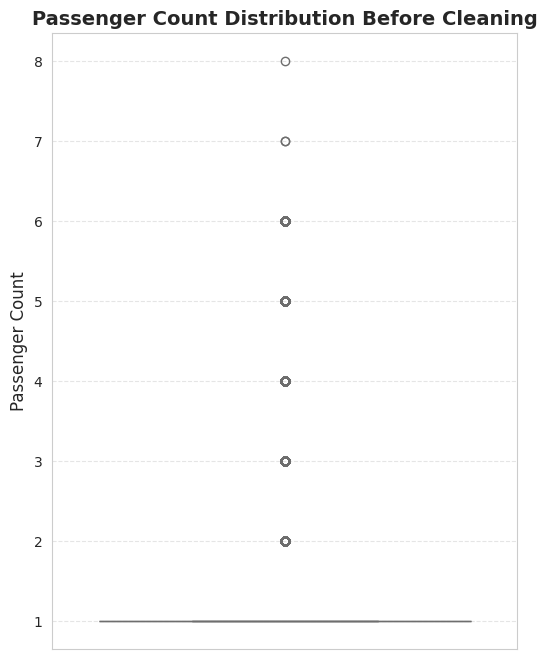

Passenger Count before cleaning:

count    299987.000000
mean          1.372346
std           0.864995
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: passenger_count, dtype: float64


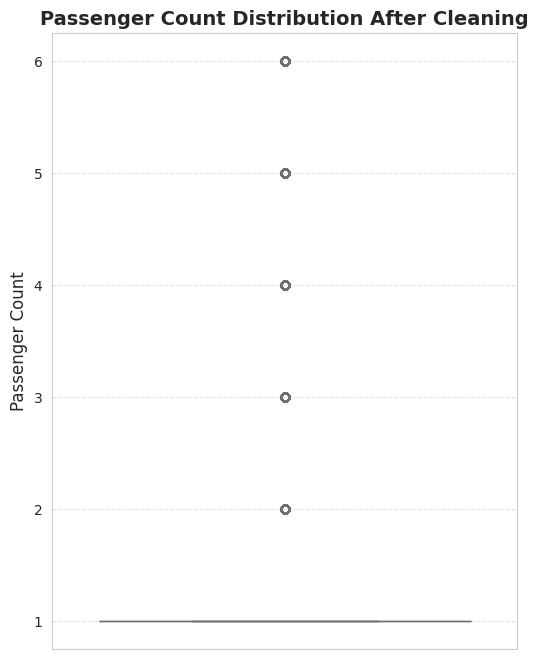

Passenger Count post cleaning:

count    299984.000000
mean          1.372287
std           0.864792
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: passenger_count, dtype: float64


In [99]:
# remove passenger_count > 6

# Passenger count distribution before cleaning
plt.figure(figsize=(6,8))
sns.boxplot(y=cleaned_df['passenger_count'], color='lightcoral')
plt.title('Passenger Count Distribution Before Cleaning', fontsize=14, fontweight='bold')
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Passenger Count before cleaning:\n")
print(cleaned_df['passenger_count'].describe())

# Only consider passenger_count <=6
cleaned_df = cleaned_df[cleaned_df['passenger_count'] <= 6]

# Passenger count distribution after cleaning
plt.figure(figsize=(6,8))
sns.boxplot(y=cleaned_df['passenger_count'], color='skyblue')
plt.title('Passenger Count Distribution After Cleaning', fontsize=14, fontweight='bold')
plt.ylabel('Passenger Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Passenger Count post cleaning:\n")
print(cleaned_df['passenger_count'].describe())

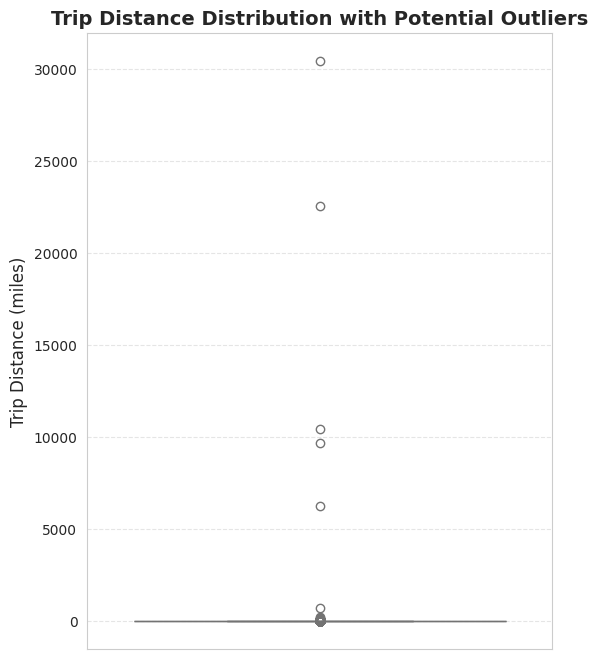

Trip distance statistics:

count    299984.000000
mean          3.714319
std          74.916346
min           0.000000
25%           1.040000
50%           1.790000
75%           3.400000
max       30430.040000
Name: trip_distance, dtype: float64


In [100]:
# Check for potential outliers in 'trip_distance' using a boxplot

plt.figure(figsize=(6,8))
sns.boxplot(y=cleaned_df["trip_distance"], color='lightgreen')
plt.title("Trip Distance Distribution with Potential Outliers", fontsize=14, fontweight='bold')
plt.ylabel("Trip Distance (miles)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

print("Trip distance statistics:\n")
print(cleaned_df['trip_distance'].describe())

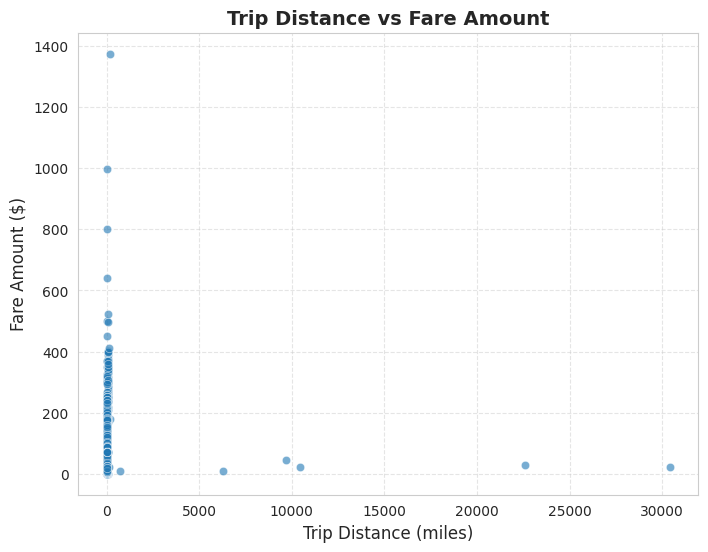

In [101]:
# Scatter plot to examine the relationship between 'trip_distance' and 'fare_amount'

plt.figure(figsize=(8,6))
sns.scatterplot(x=cleaned_df["trip_distance"], y=cleaned_df["fare_amount"], alpha=0.6)
plt.title("Trip Distance vs Fare Amount", fontsize=14, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=12)
plt.ylabel("Fare Amount ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

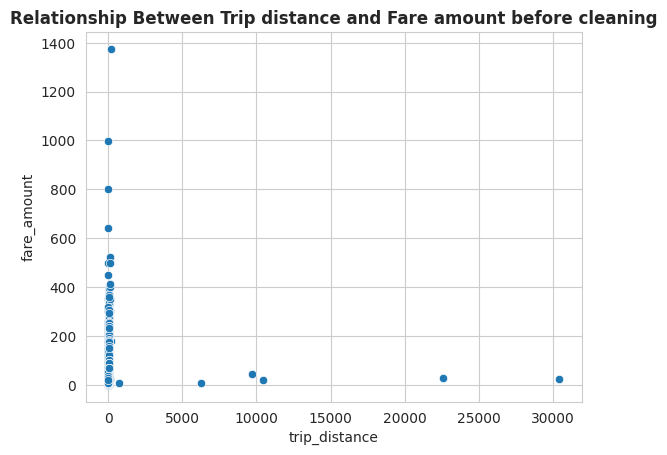

Step 1: Count of records identified as outliers: (8, 21)
Step 1: Count of records after outlier removal: (299976, 21)
Step 2: Count of records identified as outliers: (7, 21)
Step 2: Count of records after outlier removal: (299969, 21)
Step 3: Count of records identified as outliers: (6, 21)
Step 3: Count of records after outlier removal: (299963, 21)
Step 4: Count of records identified as outliers: (10282, 21)
Step 4: Count of records after outlier removal: (289681, 21)
Step 5: Count of records with invalid RatecodeID: (1649, 21)
Step 5: Count of records after removing invalid RatecodeID: (288032, 21)


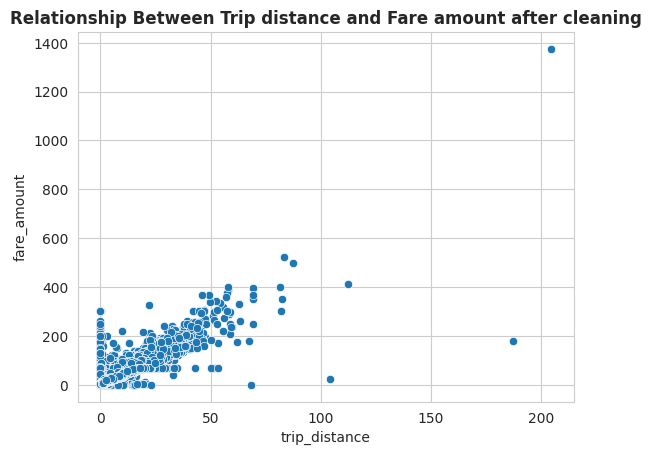

In [102]:
# Continue with outlier handling

# Relationship Between Trip distance and Fare amount before cleaning
sns.scatterplot(x=cleaned_df["trip_distance"], y= df["fare_amount"])
plt.title('Relationship Between Trip distance and Fare amount before cleaning', fontsize=12, fontweight='bold')
plt.show()

# Step 1: Remove entries where trip_distance is less than 5 and fare_amount is unusually high (>300)
outliers_trip_fare = cleaned_df[(cleaned_df['trip_distance'] < 5) & (cleaned_df['fare_amount'] > 300)]
print("Step 1: Count of records identified as outliers:", outliers_trip_fare.shape)
cleaned_step1 = cleaned_df[~((cleaned_df['trip_distance'] < 5) & (cleaned_df['fare_amount'] > 300))]
print("Step 1: Count of records after outlier removal:", cleaned_step1.shape)

# Step 2: Remove entries where trip_distance and fare_amount are 0 but pickup and dropoff zones differ
outliers_zero_trip = cleaned_step1[
    (cleaned_step1['trip_distance'] == 0) &
    (cleaned_step1['fare_amount'] == 0) &
    (cleaned_step1['PULocationID'] != cleaned_step1['DOLocationID'])
]
print("Step 2: Count of records identified as outliers:", outliers_zero_trip.shape)
cleaned_step2 = cleaned_step1[~(
    (cleaned_step1['trip_distance'] == 0) &
    (cleaned_step1['fare_amount'] == 0) &
    (cleaned_step1['PULocationID'] != cleaned_step1['DOLocationID'])
)]
print("Step 2: Count of records after outlier removal:", cleaned_step2.shape)

# Step 3: Remove entries where trip_distance > 250 (extremely rare long trips)
outliers_long_trips = cleaned_step2[cleaned_step2['trip_distance'] > 250]
print("Step 3: Count of records identified as outliers:", outliers_long_trips.shape)
cleaned_step3 = cleaned_step2[~(cleaned_step2['trip_distance'] > 250)]
print("Step 3: Count of records after outlier removal:", cleaned_step3.shape)

# Step 4: Remove entries with invalid payment_type (e.g., 0)
outliers_invalid_payment = cleaned_step3[cleaned_step3['payment_type'] == 0]
print("Step 4: Count of records identified as outliers:", outliers_invalid_payment.shape)
cleaned_step4 = cleaned_step3[cleaned_step3['payment_type'] != 0]
print("Step 4: Count of records after outlier removal:", cleaned_step4.shape)

# Step 5: Remove entries with invalid RatecodeID (valid: 1-6)
invalid_ratecode = cleaned_step4[~cleaned_step4['RatecodeID'].isin([1,2,3,4,5,6])]
print("Step 5: Count of records with invalid RatecodeID:", invalid_ratecode.shape)
cleaned_df_final = cleaned_step4[cleaned_step4['RatecodeID'].isin([1,2,3,4,5,6])]
print("Step 5: Count of records after removing invalid RatecodeID:", cleaned_df_final.shape)

# Relationship Between Trip distance and Fare amount after cleaning
sns.scatterplot(x=cleaned_df_final["trip_distance"], y= cleaned_df_final["fare_amount"])
plt.title('Relationship Between Trip distance and Fare amount after cleaning', fontsize=12, fontweight='bold')
plt.show()

In [103]:
# Do any columns need standardising?

print(cleaned_df_final.describe().T[['min', 'max', 'mean', 'std']])

                       min      max        mean        std
VendorID               1.0     2.00    1.741622   0.437743
passenger_count        1.0     6.00    1.387690   0.879111
trip_distance          0.0   204.86    3.429947   4.563772
RatecodeID             1.0     6.00    1.075131   0.395317
PULocationID           1.0   265.00  165.765536  63.593734
DOLocationID           1.0   265.00  164.605040  69.548820
payment_type           1.0     4.00    1.205328   0.465948
fare_amount            0.0  1375.00   19.685047  18.473490
extra                  0.0    14.25    1.646838   1.839511
mta_tax                0.0     4.00    0.495368   0.048510
tip_amount             0.0   200.00    3.599315   4.098783
tolls_amount           0.0    95.00    0.592262   2.176353
improvement_surcharge  0.0     1.00    0.999382   0.022665
total_amount           0.0  1435.19   28.852527  23.109101
congestion_surcharge   0.0     2.50    2.322355   0.642306
airport_fee            0.0     1.75    0.143731   0.4661

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [104]:
cleaned_df_final.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

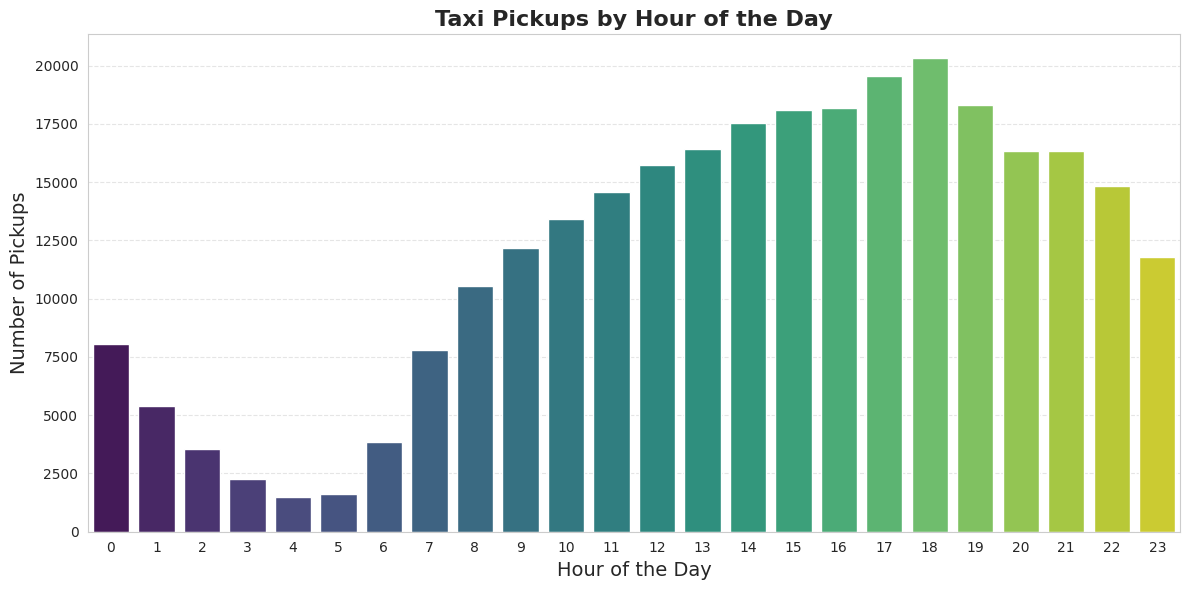

In [105]:
# Find and show the hourly trends in taxi pickups

# Convert pickup datetime and extract hour, day of week, and month
cleaned_df_final['tpep_pickup_datetime'] = pd.to_datetime(
    cleaned_df_final['tpep_pickup_datetime'], errors='coerce'
)
cleaned_df_final.loc[:, 'pickup_hour'] = cleaned_df_final['tpep_pickup_datetime'].dt.hour
cleaned_df_final.loc[:, 'pickup_day_of_week'] = cleaned_df_final['tpep_pickup_datetime'].dt.dayofweek
cleaned_df_final.loc[:, 'pickup_month'] = cleaned_df_final['tpep_pickup_datetime'].dt.month

# Count pickups by hour
pickup_counts_by_hour = cleaned_df_final.groupby('pickup_hour').size().reset_index(name='count')
plt.figure(figsize=(12,6))
sns.barplot(x='pickup_hour', y='count', data=pickup_counts_by_hour, palette='viridis')
plt.title('Taxi Pickups by Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

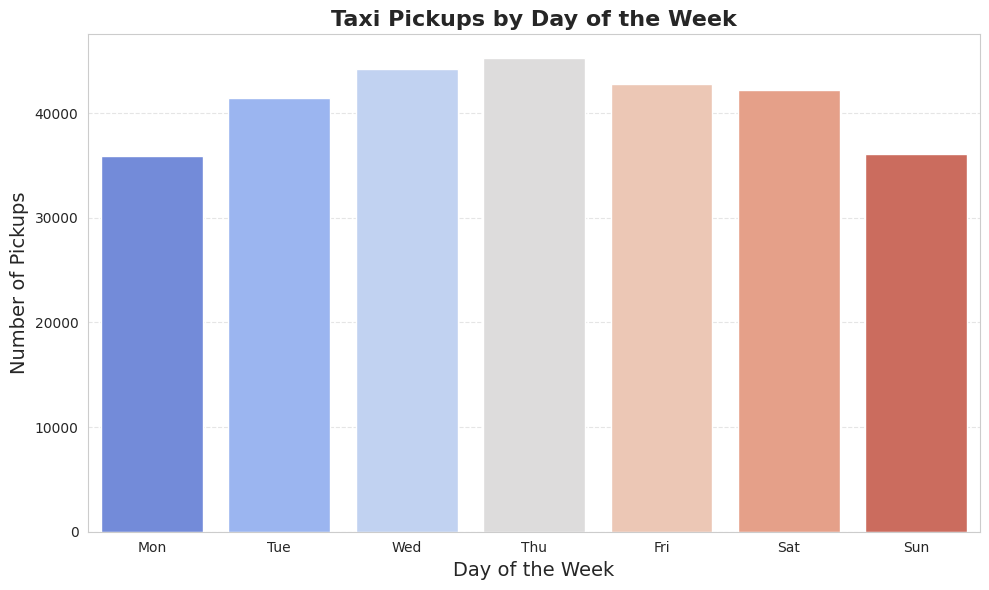

In [106]:
# Find and show the daily trends in taxi pickups (days of the week)

# Count pickups by day of the week
pickup_counts_by_day = cleaned_df_final.groupby('pickup_day_of_week').size().reset_index(name='count')
plt.figure(figsize=(10,6))
sns.barplot(
    x='pickup_day_of_week',
    y='count',
    data=pickup_counts_by_day,
    palette='coolwarm'
)
plt.title('Taxi Pickups by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


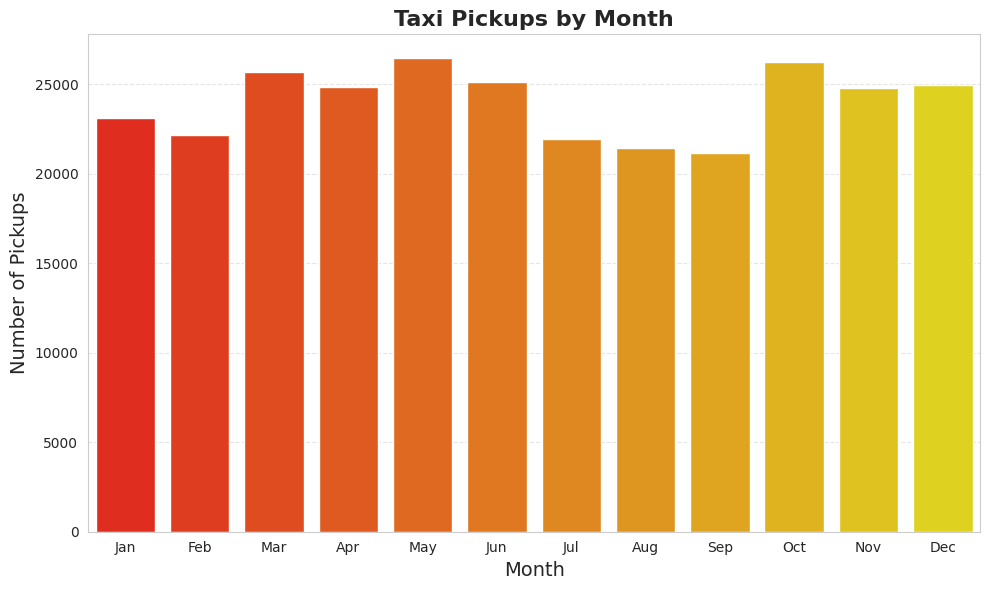

In [107]:
# Show the monthly trends in pickups

pickup_counts_by_month = cleaned_df_final.groupby('pickup_month').size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(
    x='pickup_month',
    y='count',
    data=pickup_counts_by_month,
    palette='autumn'
)
plt.title('Taxi Pickups by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [108]:
# Analyse the above parameters

# Look for zero/negative values

cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

zero_counts = (cleaned_df_final[cols_to_check] == 0).sum()
negative_counts = (cleaned_df_final[cols_to_check] < 0).sum()

analysis = pd.DataFrame({
    "Zero Values": zero_counts,
    "Negative Values": negative_counts
})

print("Analysis of zero and negative values in financial and trip distance columns:\n")
print(analysis)



Analysis of zero and negative values in financial and trip distance columns:

               Zero Values  Negative Values
fare_amount             72                0
tip_amount           63096                0
total_amount            32                0
trip_distance         3383                0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [109]:
df_clean  = cleaned_df_final.copy()

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [110]:
# Create a df with non zero entries for the selected parameters.

cols_to_filter = ['fare_amount', 'tip_amount', 'total_amount']

for col in cols_to_filter:
    df_clean = df_clean[df_clean[col] != 0]

df_clean = df_clean[~(
    (df_clean['trip_distance'] == 0) &
    (df_clean['PULocationID'] != df_clean['DOLocationID'])
)]

print("Original DataFrame shape:", cleaned_df_final.shape)
print("Non zeos and filtered DataFrame shape:", df_clean.shape)

Original DataFrame shape: (288032, 23)
Non zeos and filtered DataFrame shape: (224449, 23)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

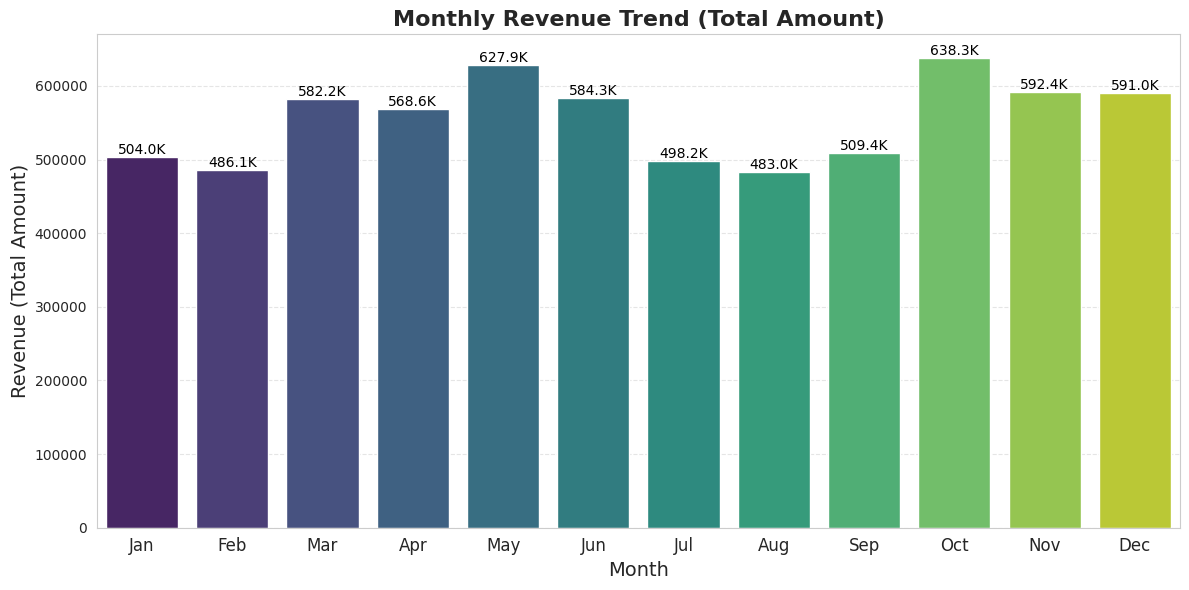

In [111]:
# Group data by month and analyse monthly revenue

monthlyRevenue = df_clean.groupby('pickup_month')['total_amount'].sum().reset_index(name='total_amount')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=monthlyRevenue, x='pickup_month', y='total_amount', palette='viridis')

# Annotate bars with revenue in K
for p in ax.patches:
    r = p.get_height() / 1000
    ax.annotate(
        f'{r:.1f}K',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points'
    )

plt.title('Monthly Revenue Trend (Total Amount)', fontsize=16, fontweight='bold')
monthLabels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(12), labels=monthLabels, fontsize=12)
plt.ylabel('Revenue (Total Amount)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly revenue and proportion of total revenue:

  quarter  total_amount  proportion
0      Q1    1572319.18    0.235890
1      Q2    1780783.14    0.267165
2      Q3    1490716.83    0.223648
3      Q4    1821649.49    0.273297


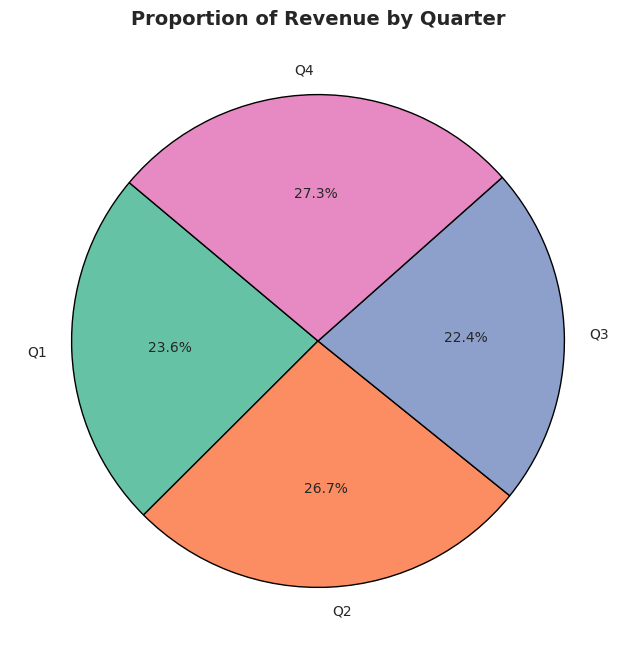

In [112]:
# Calculate proportion of each quarter

# Function to determine financial quarter
def determineQuarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df_clean['quarter'] = df_clean['pickup_month'].apply(determineQuarter)
quarterly_revenue = df_clean.groupby('quarter')['total_amount'].sum().reset_index()

# Calculate proportion of total revenue for each quarter
totalRevenue = quarterly_revenue['total_amount'].sum()
quarterly_revenue['proportion'] = quarterly_revenue['total_amount'] / totalRevenue
print("Quarterly revenue and proportion of total revenue:\n")
print(quarterly_revenue)

# Plotting the quarterly revenue proportions
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:4]
plt.pie(
    quarterly_revenue['proportion'],
    labels=quarterly_revenue['quarter'],
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66c2a5','#fc8d62','#8da0cb','#e78ac3'],
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Proportion of Revenue by Quarter', fontsize=14, fontweight='bold')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

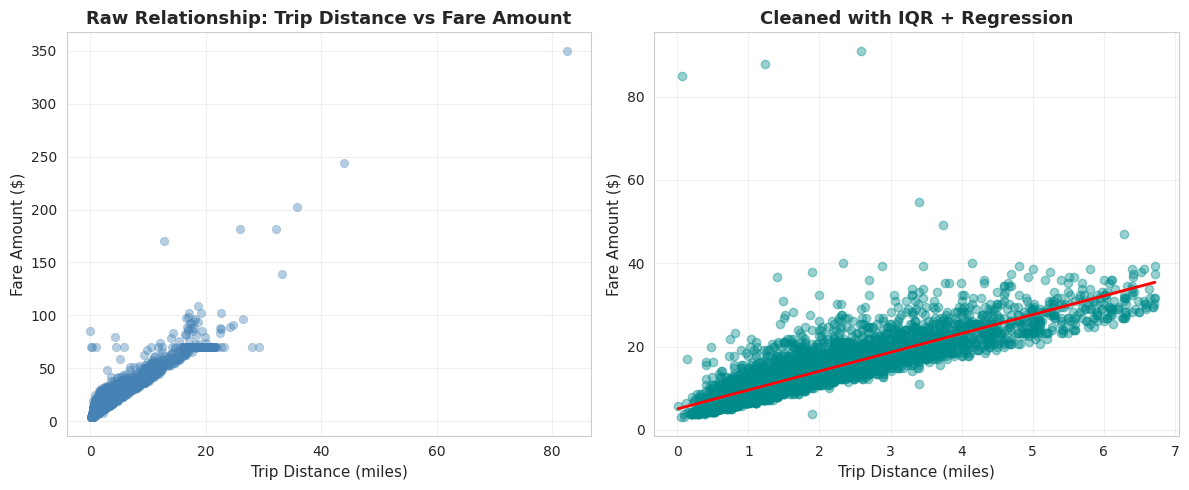

Correlation (Raw data): 0.95
Correlation (After IQR cleaning): 0.81


In [113]:
# Show how trip fare is affected by distance

df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'], errors='coerce')
filteredDF = df_clean[(df_clean['trip_distance'] > 0) & (df_clean['fare_amount'] > 0)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=filteredDF.sample(min(5000, len(filteredDF)), random_state=42),
    x='trip_distance', y='fare_amount',
    alpha=0.4, color="steelblue", edgecolor=None
)
plt.title("Raw Relationship: Trip Distance vs Fare Amount", fontsize=13, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=11)
plt.ylabel("Fare Amount ($)", fontsize=11)
plt.grid(alpha=0.3)

# IQR-based outlier removal
Q1 = filteredDF['trip_distance'].quantile(0.25)
Q3 = filteredDF['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

cleanedData = filteredDF[
    (filteredDF['trip_distance'] >= lowerBound) &
    (filteredDF['trip_distance'] <= upperBound)
]
plt.subplot(1, 2, 2)
sns.regplot(
    data=cleanedData.sample(min(5000, len(cleanedData)), random_state=42),
    x='trip_distance', y='fare_amount',
    scatter_kws={'alpha': 0.4, 'color': 'darkcyan'},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title("Cleaned with IQR + Regression", fontsize=13, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=11)
plt.ylabel("Fare Amount ($)", fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

raw_corr = filteredDF['trip_distance'].corr(filteredDF['fare_amount'])
clean_corr = cleanedData['trip_distance'].corr(cleanedData['fare_amount'])

print(f"Correlation (Raw data): {raw_corr:.2f}")
print(f"Correlation (After IQR cleaning): {clean_corr:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

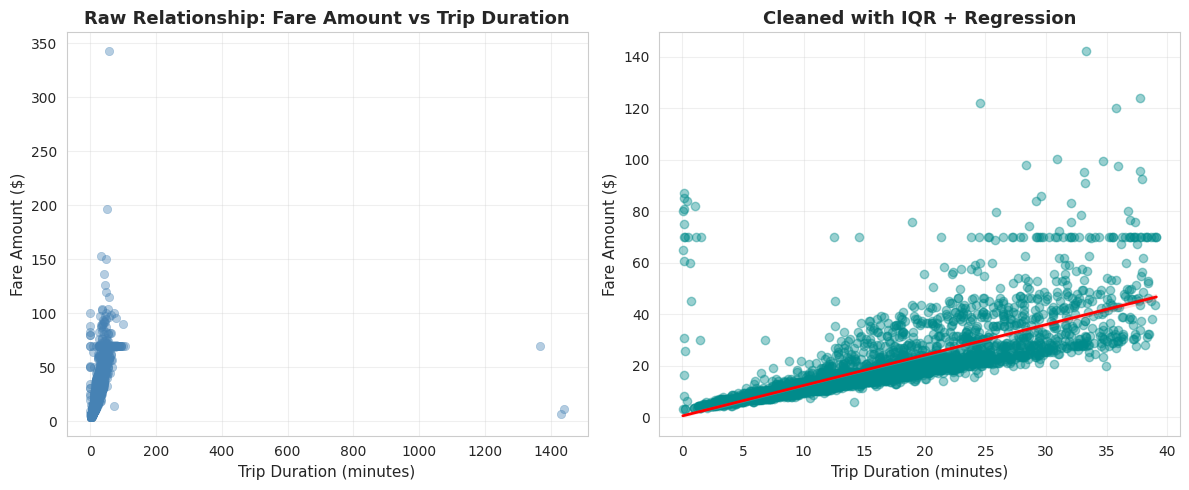

Correlation (Raw data): 0.32
Correlation (After IQR cleaning): 0.77


In [114]:
# Show relationship between fare and trip duration

# Ensure datetime columns are properly formatted
df_clean['tpep_pickup_datetime'] = pd.to_datetime(df_clean['tpep_pickup_datetime'], errors='coerce')
df_clean['tpep_dropoff_datetime'] = pd.to_datetime(df_clean['tpep_dropoff_datetime'], errors='coerce')

# Calculate trip duration in minutes
df_clean['trip_duration'] = (df_clean['tpep_dropoff_datetime'] - df_clean['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter for positive fare and trip duration
filteredDF = df_clean[(df_clean['fare_amount'] > 0) & (df_clean['trip_duration'] > 0)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=filteredDF.sample(min(5000, len(filteredDF)), random_state=42),
    x='trip_duration', y='fare_amount',
    alpha=0.4, color='steelblue', edgecolor=None
)
plt.title("Raw Relationship: Fare Amount vs Trip Duration", fontsize=13, fontweight='bold')
plt.xlabel("Trip Duration (minutes)", fontsize=11)
plt.ylabel("Fare Amount ($)", fontsize=11)
plt.grid(alpha=0.3)

# Remove outliers in trip_duration using IQR
Q1 = filteredDF['trip_duration'].quantile(0.25)
Q3 = filteredDF['trip_duration'].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

cleanedData = filteredDF[
    (filteredDF['trip_duration'] >= lowerBound) &
    (filteredDF['trip_duration'] <= upperBound)
]

plt.subplot(1, 2, 2)
sns.regplot(
    data=cleanedData.sample(min(5000, len(cleanedData)), random_state=42),
    x='trip_duration', y='fare_amount',
    scatter_kws={'alpha': 0.4, 'color':'darkcyan'},
    line_kws={'color':'red', 'linewidth':2}
)
plt.title("Cleaned with IQR + Regression", fontsize=13, fontweight='bold')
plt.xlabel("Trip Duration (minutes)", fontsize=11)
plt.ylabel("Fare Amount ($)", fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

raw_corr = filteredDF['trip_duration'].corr(filteredDF['fare_amount'])
clean_corr = cleanedData['trip_duration'].corr(cleanedData['fare_amount'])

print(f"Correlation (Raw data): {raw_corr:.2f}")
print(f"Correlation (After IQR cleaning): {clean_corr:.2f}")

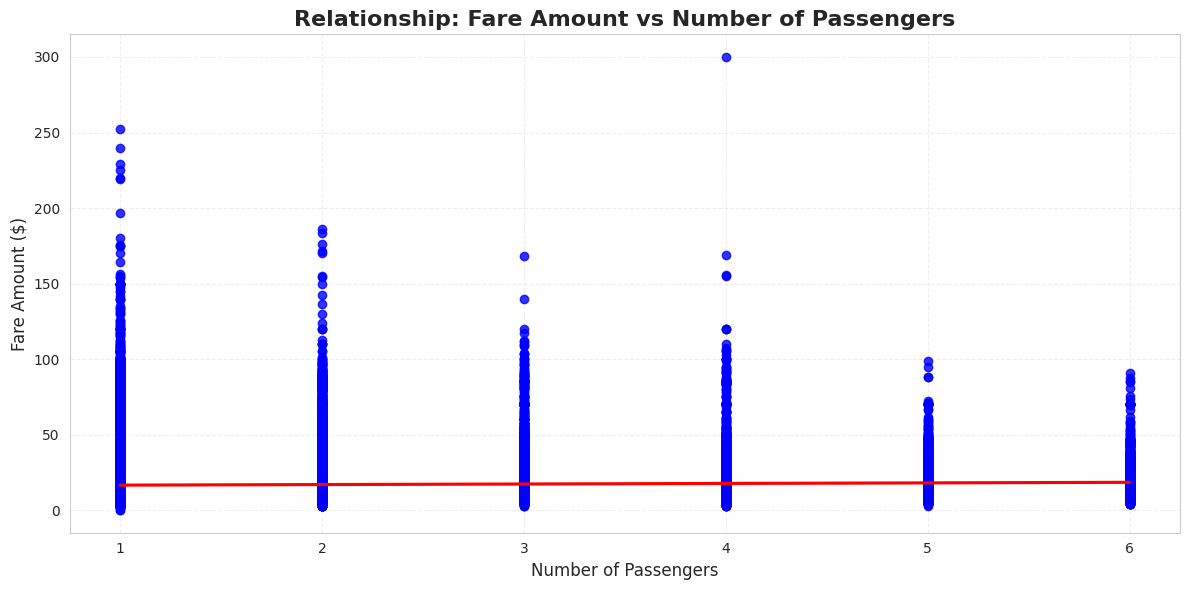

Correlation between Fare Amount and Passenger Count: 0.03


In [115]:
# Show relationship between fare and number of passengers

# Plot scatter plot with regression line
plt.figure(figsize=(12, 6))
sns.regplot(data=cleanedData, x='passenger_count', y='fare_amount', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship: Fare Amount vs Number of Passengers', fontsize=16, fontweight='bold')
plt.xlabel('Number of Passengers', fontsize=12)
plt.ylabel('Fare Amount ($)', fontsize=12)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

corr_passenger_fare = cleanedData['fare_amount'].corr(cleanedData['passenger_count'])
print(f'Correlation between Fare Amount and Passenger Count: {corr_passenger_fare:.2f}')


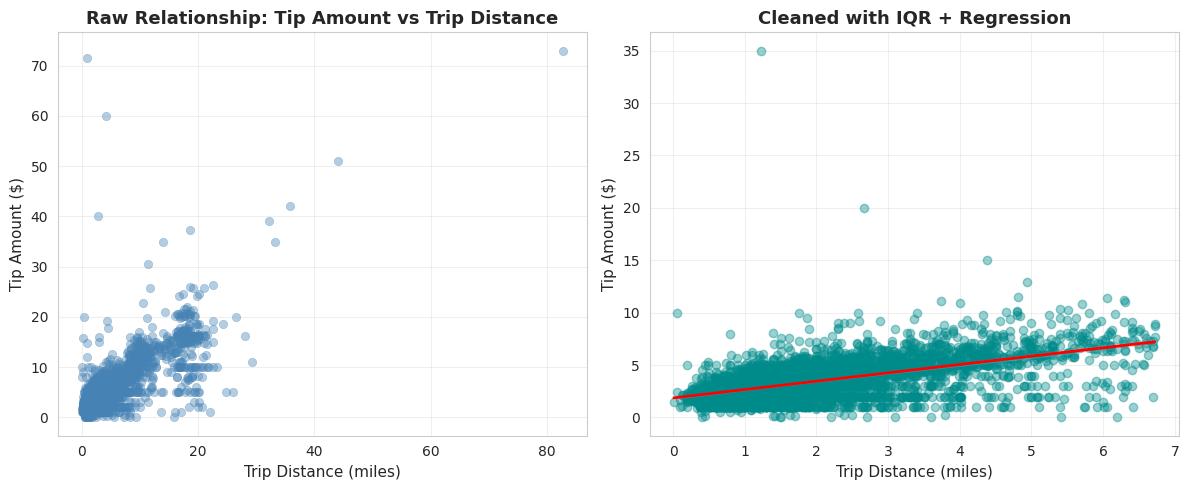

Correlation (Raw data): 0.80
Correlation (After IQR cleaning): 0.53


In [116]:
# Show relationship between tip and trip distance

# Filter for positive tip and trip distance
filteredDF = df_clean[(df_clean['tip_amount'] > 0) & (df_clean['trip_distance'] > 0)]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=filteredDF.sample(min(5000, len(filteredDF)), random_state=42),
    x='trip_distance', y='tip_amount',
    alpha=0.4, color="steelblue", edgecolor=None
)
plt.title("Raw Relationship: Tip Amount vs Trip Distance", fontsize=13, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=11)
plt.ylabel("Tip Amount ($)", fontsize=11)
plt.grid(alpha=0.3)

# Remove outliers in trip_distance using IQR
Q1 = filteredDF['trip_distance'].quantile(0.25)
Q3 = filteredDF['trip_distance'].quantile(0.75)
IQR = Q3 - Q1
lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5 * IQR

cleanedData = filteredDF[
    (filteredDF['trip_distance'] >= lowerBound) &
    (filteredDF['trip_distance'] <= upperBound)
]

plt.subplot(1, 2, 2)
sns.regplot(
    data=cleanedData.sample(min(5000, len(cleanedData)), random_state=42),
    x='trip_distance', y='tip_amount',
    scatter_kws={'alpha': 0.4, 'color': 'darkcyan'},
    line_kws={'color': 'red', 'linewidth': 2}
)
plt.title("Cleaned with IQR + Regression", fontsize=13, fontweight='bold')
plt.xlabel("Trip Distance (miles)", fontsize=11)
plt.ylabel("Tip Amount ($)", fontsize=11)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

raw_corr = filteredDF['trip_distance'].corr(filteredDF['tip_amount'])
clean_corr = cleanedData['trip_distance'].corr(cleanedData['tip_amount'])

print(f"Correlation (Raw data): {raw_corr:.2f}")
print(f"Correlation (After IQR cleaning): {clean_corr:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

Counts of Payment Types:
payment_type_name
Cash                6
Credit Card    194616
Dispute             2
Name: count, dtype: int64

Percentage Distribution of Payment Types:
payment_type_name
Cash             0.0
Credit Card    100.0
Dispute          0.0
Name: proportion, dtype: float64


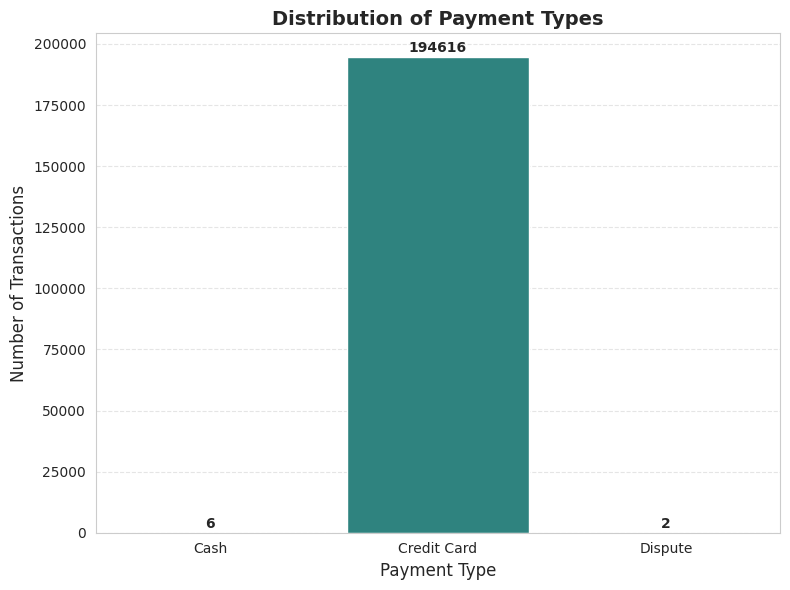

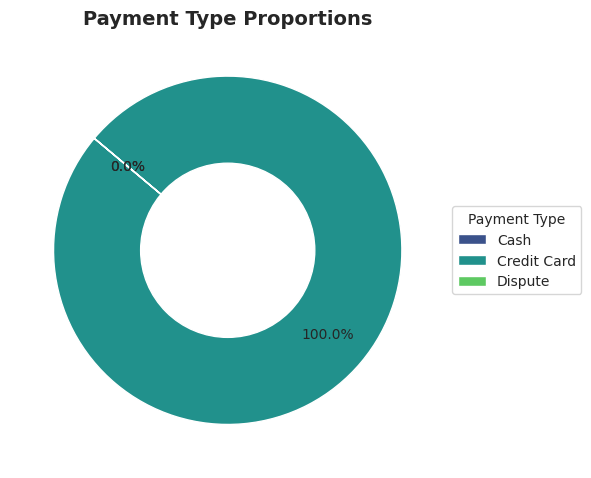

In [117]:
# Analyse the distribution of different payment types (payment_type)

payment_type_mapping = {
    1: "Credit Card",
    2: "Cash",
    3: "No Charge",
    4: "Dispute"
}
cleanedData['payment_type_name'] = cleanedData['payment_type'].map(payment_type_mapping)

# Calculate counts and percentages
payment_counts = cleanedData['payment_type_name'].value_counts().sort_index()
payment_percent = cleanedData['payment_type_name'].value_counts(normalize=True).sort_index() * 100

print("Counts of Payment Types:")
print(payment_counts)
print("\nPercentage Distribution of Payment Types:")
print(payment_percent.round(2))

plt.figure(figsize=(8,6))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette="viridis")
plt.title("Distribution of Payment Types", fontsize=14, fontweight="bold")
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

# Annotate bar counts
for i, val in enumerate(payment_counts.values):
    plt.text(i, val + (0.01 * payment_counts.max()), str(val),
             ha='center', fontsize=10, fontweight="bold")

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,6))
colors = sns.color_palette("viridis", len(payment_counts))

wedges, texts, autotexts = plt.pie(
    payment_percent,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    pctdistance=0.75
)

centre_circle = plt.Circle((0,0),0.50,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.legend(
    wedges,
    payment_counts.index,
    title="Payment Type",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Payment Type Proportions", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [118]:
pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [119]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/My Drive/Mandatory_Assignment/taxi_zones/taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

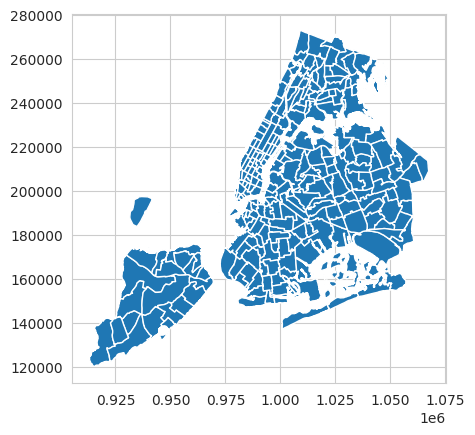

In [120]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [121]:
# Merge zones and trip records using locationID and PULocationID

mergedData = pd.merge(
    cleanedData,
    zones,
    left_on='PULocationID',
    right_on='LocationID',
    how='inner'
)

print("Merged DataFrame preview:")
mergedData.head()

Merged DataFrame preview:


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,quarter,trip_duration,payment_type_name,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,2023-10-02 18:26:58,2023-10-02 18:40:44,1.0,2.20,1.0,N,162,236,1,...,Q4,13.766667,Credit Card,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21..."
1,1,2023-04-12 08:29:38,2023-04-12 08:36:14,1.0,0.80,1.0,N,88,261,1,...,Q2,6.600000,Credit Card,88,0.035205,0.000057,Financial District South,88,Manhattan,"POLYGON ((981547.706 196045.255, 981628.588 19..."
2,1,2023-12-08 15:30:29,2023-12-08 15:50:44,1.0,5.70,1.0,Y,166,243,1,...,Q4,20.250000,Credit Card,166,0.068824,0.000255,Morningside Heights,166,Manhattan,"POLYGON ((996131.213 235950.777, 996354.986 23..."
3,2,2023-01-27 08:00:44,2023-01-27 08:18:51,2.0,2.68,1.0,N,140,74,1,...,Q1,18.116667,Credit Card,140,0.047584,0.000114,Lenox Hill East,140,Manhattan,"POLYGON ((995735.062 215619.835, 995670.105 21..."
4,2,2023-04-17 10:35:47,2023-04-17 10:40:33,1.0,0.82,1.0,N,238,239,1,...,Q2,4.766667,Credit Card,238,0.060109,0.000185,Upper West Side North,238,Manhattan,"POLYGON ((992877.88 225627.534, 992741.735 225..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [122]:
# Group data by location and calculate the number of trips

trip_count_by_location = mergedData.groupby('LocationID').size().reset_index(name='total_num_trips')
print("Total trips per pickup location:")
trip_count_by_location


Total trips per pickup location:


,LocationID,total_num_trips
0,1,2
1,4,231
2,7,43
3,10,1
4,12,75
...,...,...
142,256,37
143,260,13
144,261,957
145,262,2998


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [123]:
# Merge trip counts back to the zones GeoDataFrame

mergedTripCountsData = pd.merge(zones, trip_count_by_location, how='left', on='LocationID')
mergedTripCountsData


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_num_trips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",2.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",231.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",NaN
...,...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ...",NaN
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ...",13.0
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19...",957.0
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824....",2998.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

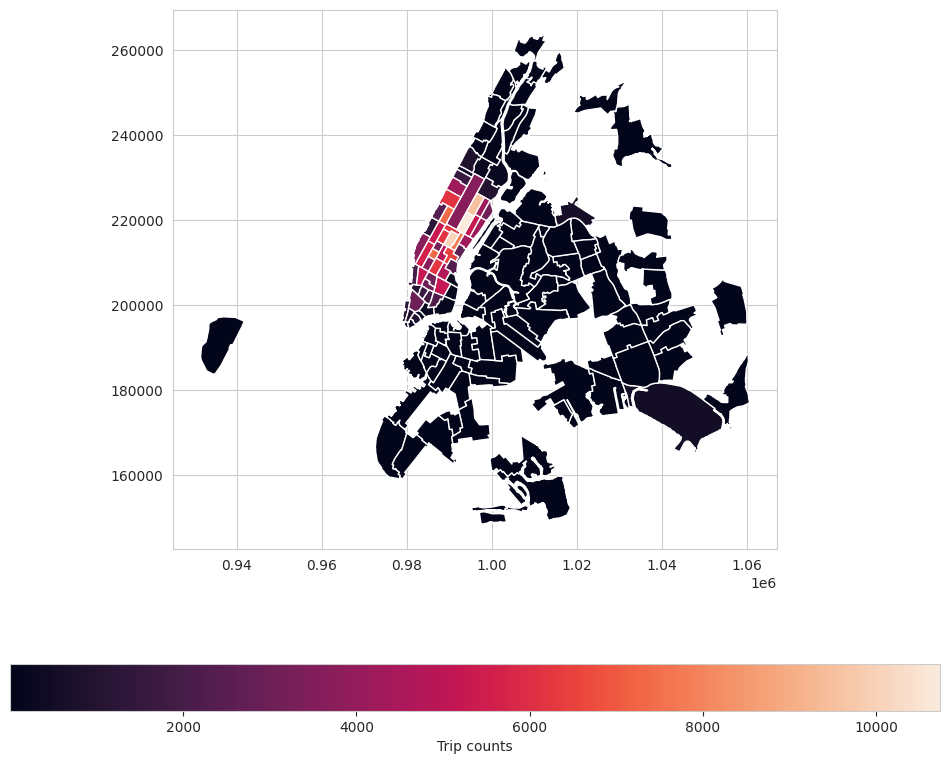

In [124]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

mergedTripCountsData.plot(column = 'total_num_trips', ax = ax, legend = True, legend_kwds = {'label': "Trip counts", 'orientation': "horizontal"})
plt.show()

In [125]:
# can you try displaying the zones DF sorted by the number of trips?

sortedZones = mergedTripCountsData.sort_values(by='total_num_trips', ascending=False)
sortedZones

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,total_num_trips
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",10739.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",10069.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",9549.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",7759.0
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",7418.0
...,...,...,...,...,...,...,...,...
252,253,0.036051,0.000078,Willets Point,253,Queens,"POLYGON ((1028825.348 218121.42, 1029152.461 2...",NaN
253,254,0.085886,0.000360,Williamsbridge/Olinville,254,Bronx,"POLYGON ((1025214.477 259577.301, 1025348.099 ...",NaN
256,257,0.058669,0.000139,Windsor Terrace,257,Brooklyn,"POLYGON ((989842.548 179997.856, 989842.643 17...",NaN
257,258,0.089013,0.000366,Woodhaven,258,Queens,"POLYGON ((1027223.758 190451.926, 1027233.961 ...",NaN


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [126]:
# Find routes which have the slowest speeds at different times of the day

# Convert pickup and dropoff datetime columns to proper datetime format
mergedData['tpep_pickup_datetime'] = pd.to_datetime(mergedData['tpep_pickup_datetime'])
mergedData['tpep_dropoff_datetime'] = pd.to_datetime(mergedData['tpep_dropoff_datetime'])


mergedData['pickup_hour_of_day'] = mergedData['tpep_pickup_datetime'].dt.hour
mergedData['trip_duration_min'] = (mergedData['tpep_dropoff_datetime'] - mergedData['tpep_pickup_datetime']).dt.total_seconds() / 60

hourly_route_stats = mergedData.groupby(
    ['pickup_hour_of_day', 'PULocationID', 'DOLocationID']
).agg(
    avg_duration=('trip_duration_min', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

# Compute average speed for each route
hourly_route_stats['avg_speed_miles_per_min'] = hourly_route_stats['avg_distance'] / hourly_route_stats['avg_duration']

# Sort by hour and speed to identify slowest routes
slowest_routes_by_hour = hourly_route_stats.sort_values(by=['pickup_hour_of_day', 'avg_speed_miles_per_min'], ascending=[True, True])

# Select top 5 slowest routes per hour
top5_slowest_routes = slowest_routes_by_hour.groupby('pickup_hour_of_day').head(5)

# Display results
print("Slowest routes for each hour of the day (avg speed in miles/min):")
top5_slowest_routes[['pickup_hour_of_day', 'PULocationID', 'DOLocationID', 'avg_speed_miles_per_min']]


Slowest routes for each hour of the day (avg speed in miles/min):


,pickup_hour_of_day,PULocationID,DOLocationID,avg_speed_miles_per_min
239,0,79,68,0.014163
881,0,148,107,0.017802
1752,0,246,265,0.048115
1301,0,209,87,0.063343
830,0,144,144,0.065934
...,...,...,...,...
43031,23,263,43,0.001365
42634,23,233,48,0.003178
41457,23,113,87,0.005542
42872,23,239,236,0.010491


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

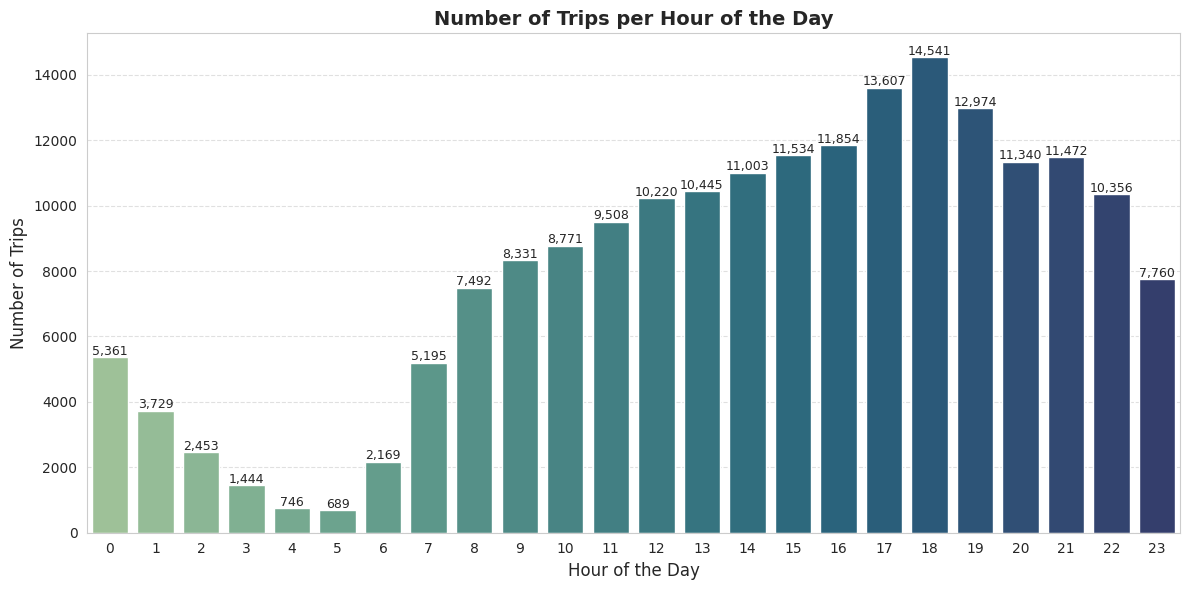

Peak activity detected: Hour 18 with 14,541 trips.


In [127]:
# Visualise the number of trips per hour and find the busiest hour

hourly_trips = mergedData.groupby('pickup_hour_of_day').size().reset_index(name='num_trips')

# Convert hour values to integer
hourly_trips['pickup_hour_of_day'] = hourly_trips['pickup_hour_of_day'].astype(int)

# Visualize the number of trips per hour
plt.figure(figsize=(12, 6))
sns.barplot(
    x='pickup_hour_of_day',
    y='num_trips',
    data=hourly_trips,
    palette='crest'
)

plt.title('Number of Trips per Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Bar annotation with value
for index, row in hourly_trips.iterrows():
    plt.text(row['pickup_hour_of_day'], row['num_trips'] + (0.005 * hourly_trips['num_trips'].max()),
             f"{row['num_trips']:,}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Find the busiest hour
busiest = hourly_trips.loc[hourly_trips['num_trips'].idxmax()]
print(f"Peak activity detected: Hour {busiest['pickup_hour_of_day']} with {busiest['num_trips']:,} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [128]:
hourly_trips.columns.tolist()

['pickup_hour_of_day', 'num_trips']

The five busiest hours with actual trip counts are:
    pickup_hour_of_day  actual_num_trips
18                  18          290820.0
17                  17          272140.0
19                  19          259480.0
16                  16          237080.0
15                  15          230680.0


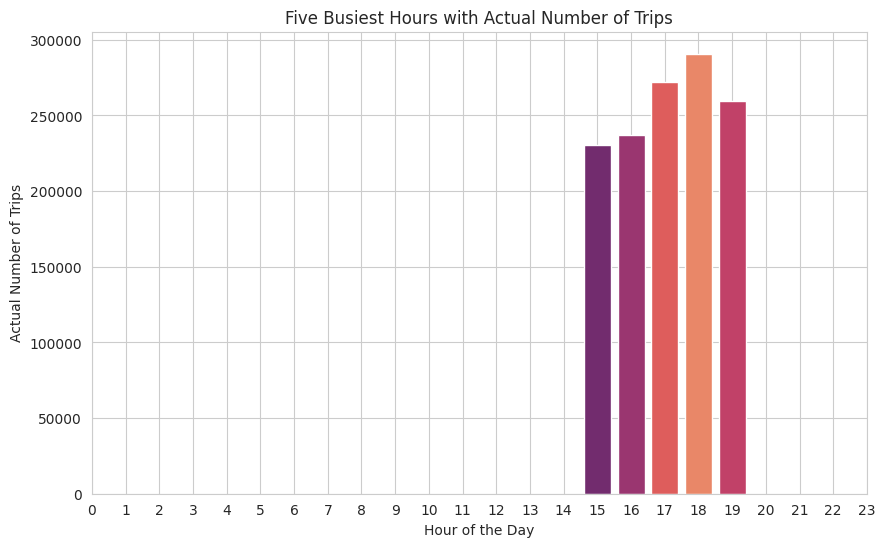

In [129]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
samplingRatio = 0.05

# Scale the number of trips up by the sampling ratio
hourly_trips['actual_num_trips'] = hourly_trips['num_trips'] / samplingRatio
busiest_hours = hourly_trips.sort_values(by='actual_num_trips', ascending=False).head(5)

print("The five busiest hours with actual trip counts are:")
print(busiest_hours[['pickup_hour_of_day', 'actual_num_trips']])

plt.figure(figsize=(10, 6))
colors = sns.color_palette("flare", len(busiest_hours))
plt.bar(busiest_hours['pickup_hour_of_day'], busiest_hours['actual_num_trips'], color=colors)
plt.title('Five Busiest Hours with Actual Number of Trips')
plt.xlabel('Hour of the Day')
plt.ylabel('Actual Number of Trips')
plt.xticks(range(24))
plt.show()

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

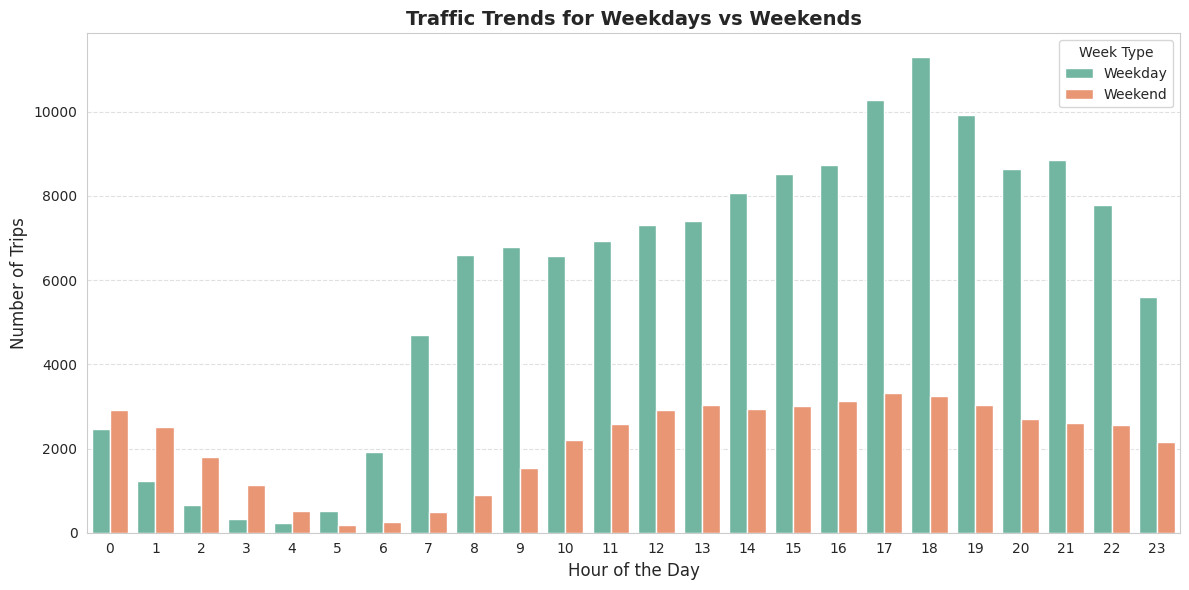

In [130]:
# Compare traffic trends for the week days and weekends

mergedData['day_of_week'] = mergedData['tpep_pickup_datetime'].dt.weekday

#  Categorize into weekdays (0-4) and weekends (5-6)
mergedData['week_type'] = mergedData['day_of_week'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

tripsByWeektype = mergedData.groupby(['week_type', 'pickup_hour_of_day']).size().reset_index(name='num_trips_week_type')
trips_pivot = tripsByWeektype.pivot(index='pickup_hour_of_day', columns='week_type', values='num_trips_week_type')

# Plot the traffic trends for weekdays and weekends
plt.figure(figsize=(12, 6))
sns.barplot(
    x='pickup_hour_of_day',
    y='num_trips_week_type',
    hue='week_type',
    data=tripsByWeektype,
    palette='Set2'
)

plt.title('Traffic Trends for Weekdays vs Weekends', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Week Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

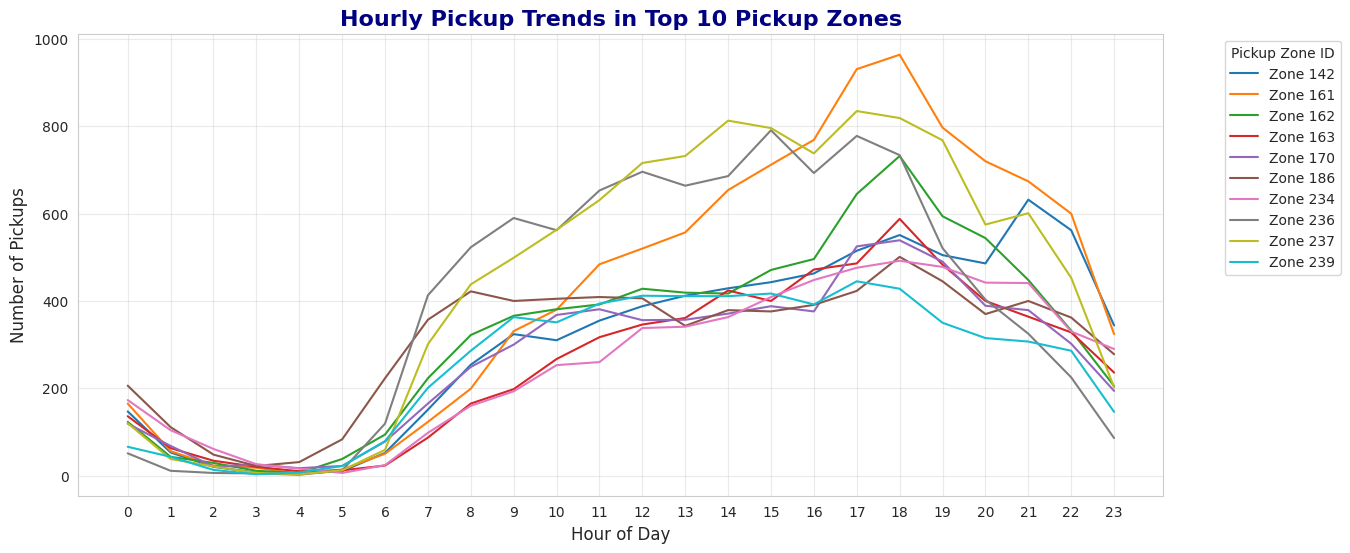

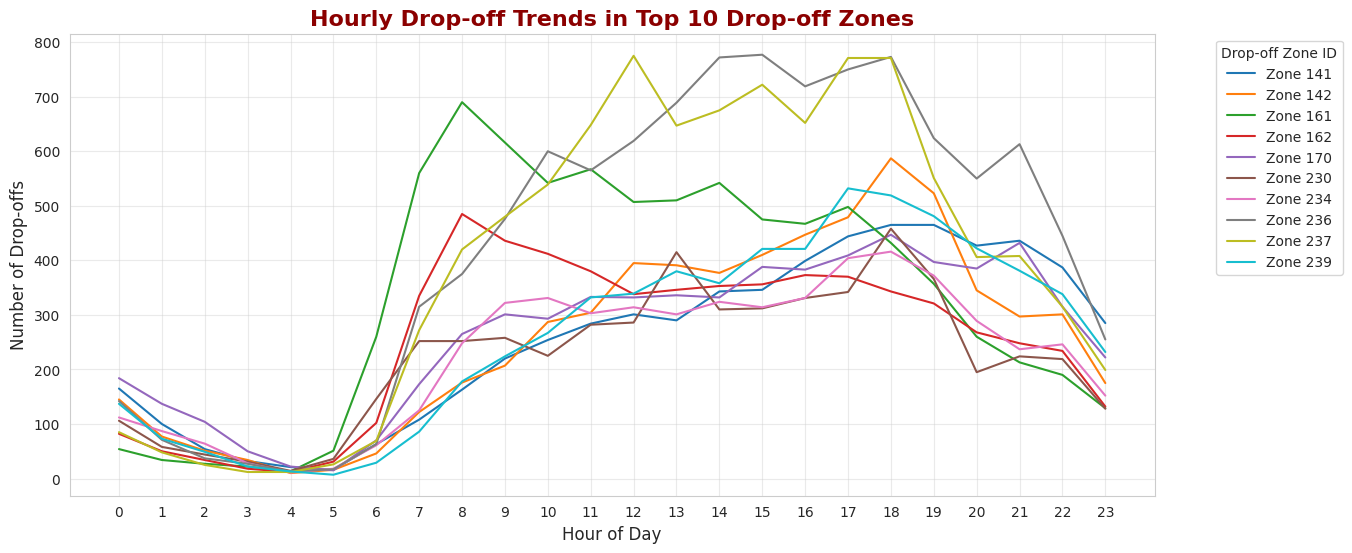

In [131]:
# Find top 10 pickup and dropoff zones

# Find top 10 pickup zones overall
pickup_counts = mergedData.groupby("PULocationID").size().reset_index(name="pickup_count")
top10_pickup_zones = pickup_counts.sort_values(by="pickup_count", ascending=False).head(10)["PULocationID"]

# Find top 10 drop-off zones overall
dropoff_counts = mergedData.groupby("DOLocationID").size().reset_index(name="dropoff_count")
top10_dropoff_zones = dropoff_counts.sort_values(by="dropoff_count", ascending=False).head(10)["DOLocationID"]

# Filter dataset for only these top zones
pickup_trends = mergedData[mergedData["PULocationID"].isin(top10_pickup_zones)]
dropoff_trends = mergedData[mergedData["DOLocationID"].isin(top10_dropoff_zones)]

# Hourly pickup trends
pickup_hourly = pickup_trends.groupby(["pickup_hour_of_day", "PULocationID"]).size().reset_index(name="pickup_count")
pickup_pivot = pickup_hourly.pivot(index="pickup_hour_of_day", columns="PULocationID", values="pickup_count").fillna(0)

# Hourly drop-off trends
dropoff_hourly = dropoff_trends.groupby(["pickup_hour_of_day", "DOLocationID"]).size().reset_index(name="dropoff_count")
dropoff_pivot = dropoff_hourly.pivot(index="pickup_hour_of_day", columns="DOLocationID", values="dropoff_count").fillna(0)

# Plot pickups
plt.figure(figsize=(14,6))
for col in pickup_pivot.columns:
    plt.plot(pickup_pivot.index, pickup_pivot[col], label=f"Zone {col}")
plt.title("Hourly Pickup Trends in Top 10 Pickup Zones", fontsize=16, fontweight="bold", color="navy")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="Pickup Zone ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.4)
plt.show()

# Plot drop-offs
plt.figure(figsize=(14,6))
for col in dropoff_pivot.columns:
    plt.plot(dropoff_pivot.index, dropoff_pivot[col], label=f"Zone {col}")
plt.title("Hourly Drop-off Trends in Top 10 Drop-off Zones", fontsize=16, fontweight="bold", color="darkred")
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Drop-offs", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="Drop-off Zone ID", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(alpha=0.4)
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [132]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_summary = mergedData.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_summary = mergedData.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge pickup and dropoff counts on the location IDs
pickup_dropoff_summary = pd.merge(
    pickup_summary,
    dropoff_summary,
    left_on='PULocationID',
    right_on='DOLocationID',
    how='outer'  # Ensure all zones are included, even if one of the counts is missing
)

# Fill missing values with 0
pickup_dropoff_summary.fillna(0, inplace=True)

# Calculate the pickup-to-dropoff ratio
pickup_dropoff_summary['pickup_dropoff_ratio'] = (
    pickup_dropoff_summary['pickup_count'] / pickup_dropoff_summary['dropoff_count'].replace(0, float('inf'))
)

ratio_sorted = pickup_dropoff_summary.sort_values(by='pickup_dropoff_ratio', ascending=False)

top_10_ratios = ratio_sorted.head(10)
bottom_10_ratios = ratio_sorted.tail(10)

# Display results
print("Top 10 zones with the highest Pickup-to-Dropoff Ratios:")
print(top_10_ratios[['PULocationID', 'pickup_dropoff_ratio']])

print("\nBottom 10 zones with the lowest Pickup-to-Dropoff Ratios:")
print(bottom_10_ratios[['PULocationID', 'pickup_dropoff_ratio']])

Top 10 zones with the highest Pickup-to-Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
84          138.0             12.407407
78          132.0              4.411765
40           70.0              2.558824
123         186.0              1.688214
22           43.0              1.431021
66          114.0              1.348764
174         249.0              1.329055
60          100.0              1.295902
106         162.0              1.280574
105         161.0              1.256113

Bottom 10 zones with the lowest Pickup-to-Dropoff Ratios:
     PULocationID  pickup_dropoff_ratio
142           0.0                   0.0
135           0.0                   0.0
169         242.0                   0.0
168           0.0                   0.0
155           0.0                   0.0
175           0.0                   0.0
178           0.0                   0.0
179           0.0                   0.0
184           0.0                   0.0
185           0.0                   0.0


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

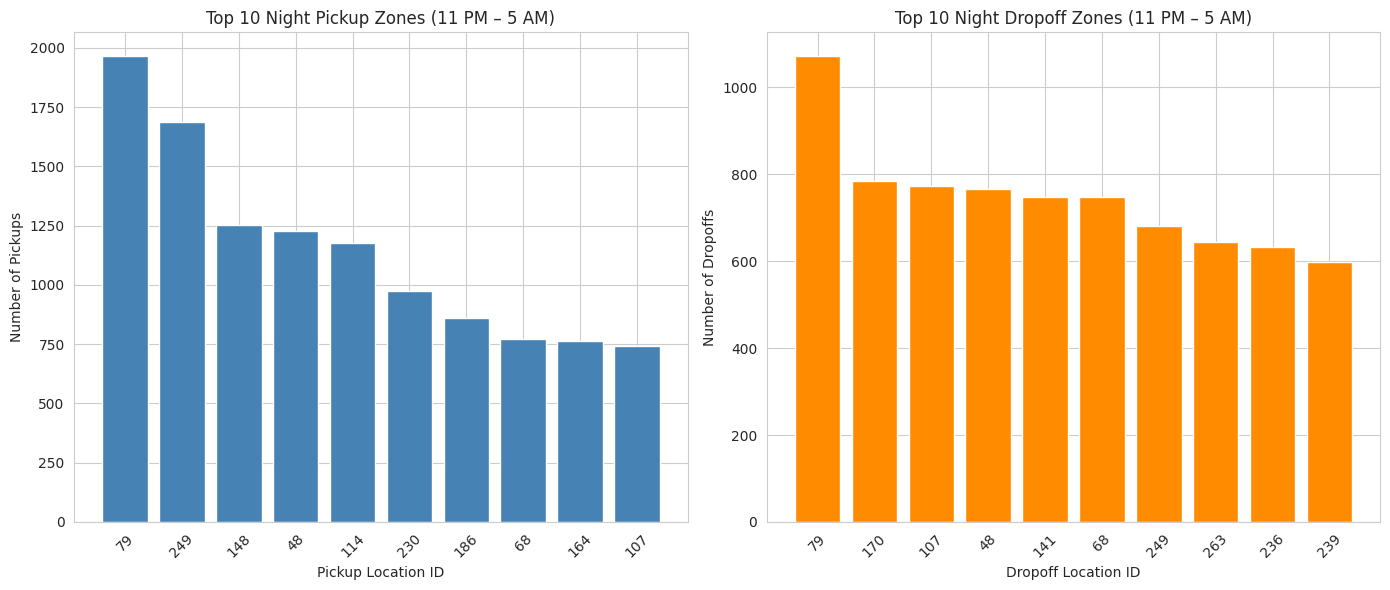

In [133]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

mergedData['pickup_hour'] = mergedData['tpep_pickup_datetime'].dt.hour
mergedData['dropoff_hour'] = mergedData['tpep_dropoff_datetime'].dt.hour

# Filter trips between 11 PM (23) and 5 AM (inclusive)
night_trips = mergedData[
    ((mergedData['pickup_hour'] >= 23) | (mergedData['pickup_hour'] <= 5)) |
    ((mergedData['dropoff_hour'] >= 23) | (mergedData['dropoff_hour'] <= 5))
]

# Group separately for pickups and dropoffs
night_pickups = night_trips.groupby('PULocationID').size().reset_index(name='night_pickups')
night_dropoffs = night_trips.groupby('DOLocationID').size().reset_index(name='night_dropoffs')
top_10_night_pickups = night_pickups.sort_values(by='night_pickups', ascending=False).head(10)
top_10_night_dropoffs = night_dropoffs.sort_values(by='night_dropoffs', ascending=False).head(10)

plt.figure(figsize=(14, 6))

# Plot pickups
plt.subplot(1, 2, 1)
plt.bar(top_10_night_pickups['PULocationID'].astype(str), top_10_night_pickups['night_pickups'], color='steelblue')
plt.title('Top 10 Night Pickup Zones (11 PM – 5 AM)')
plt.xlabel('Pickup Location ID')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)

# Plot dropoffs
plt.subplot(1, 2, 2)
plt.bar(top_10_night_dropoffs['DOLocationID'].astype(str), top_10_night_dropoffs['night_dropoffs'], color='darkorange')
plt.title('Top 10 Night Dropoff Zones (11 PM – 5 AM)')
plt.xlabel('Dropoff Location ID')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Total Revenue: $4286885.66
Nighttime Revenue: $497062.02
Daytime Revenue: $3789823.64
Nighttime Revenue Share: 11.59%
Daytime Revenue Share: 88.41%


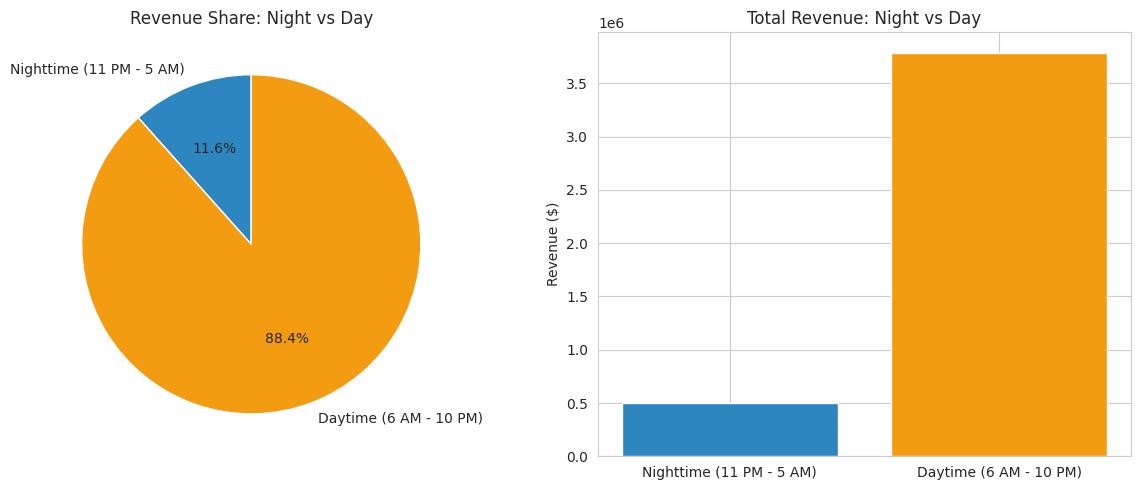

In [134]:
# Filter for night hours (11 PM to 5 AM)

mergedData['is_night'] = mergedData['pickup_hour'].apply(lambda x: 23 <= x or x <= 5)

# Calculate total revenue
mergedData['total_revenue'] = mergedData['total_amount']

# Calculate total revenue during nighttime
nighttimeRevenue = mergedData[mergedData['is_night']]['total_revenue'].sum()

# Calculate total revenue during daytime
daytimeRevenue = mergedData[~mergedData['is_night']]['total_revenue'].sum()

# Calculate the total revenue for the entire dataset
totalRevenue = mergedData['total_revenue'].sum()

# Calculate the revenue share for nighttime and daytime
nighttimeRevenueShare = nighttimeRevenue / totalRevenue * 100
daytimeRevenueShare = daytimeRevenue / totalRevenue * 100

# Print the results
print(f"Total Revenue: ${totalRevenue:.2f}")
print(f"Nighttime Revenue: ${nighttimeRevenue:.2f}")
print(f"Daytime Revenue: ${daytimeRevenue:.2f}")
print(f"Nighttime Revenue Share: {nighttimeRevenueShare:.2f}%")
print(f"Daytime Revenue Share: {daytimeRevenueShare:.2f}%")

labels = ['Nighttime (11 PM - 5 AM)', 'Daytime (6 AM - 10 PM)']
values = [nighttimeRevenue, daytimeRevenue]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2E86C1', '#F39C12'])
plt.title('Revenue Share: Night vs Day')

plt.subplot(1, 2, 2)
plt.bar(labels, values, color=['#2E86C1', '#F39C12'])
plt.title('Total Revenue: Night vs Day')
plt.ylabel('Revenue ($)')

plt.tight_layout()
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average fare per mile per passenger by passenger count (descending order):
   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.429159
1              2.0                     5.281320
3              4.0                     4.365788
2              3.0                     3.647969
4              5.0                     1.624703
5              6.0                     1.355710


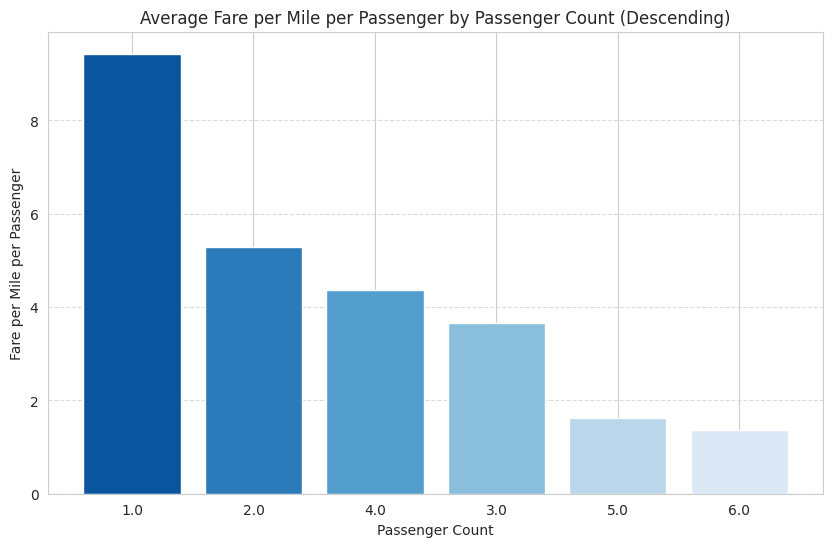

In [135]:
# Analyse the fare per mile per passenger for different passenger counts

# Filter out trips with zero distance
mergedData = mergedData[mergedData['trip_distance'] > 0]

# Calculate the fare per mile for each trip
mergedData['fare_per_mile'] = mergedData['fare_amount'] / mergedData['trip_distance']

# Calculate fare per mile per passenger
mergedData['fare_per_mile_per_passenger'] = mergedData['fare_per_mile'] / mergedData['passenger_count']

# Group by passenger count and compute the average fare per mile per passenger
avg_fare_per_passenger = mergedData.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

avg_fare_per_passenger_sorted = avg_fare_per_passenger.sort_values(by='fare_per_mile_per_passenger', ascending=False)

# Display the sorted average fare per mile per passenger
print("Average fare per mile per passenger by passenger count (descending order):")
print(avg_fare_per_passenger_sorted)

# Plot the results as a bar chart
plt.figure(figsize=(10,6))
palette = sns.color_palette("Blues_r", n_colors=len(avg_fare_per_passenger_sorted))
plt.bar(avg_fare_per_passenger_sorted['passenger_count'].astype(str),
        avg_fare_per_passenger_sorted['fare_per_mile_per_passenger'],
        color=palette)

plt.title('Average Fare per Mile per Passenger by Passenger Count (Descending)')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Hour of the Day:
    hour_of_day  fare_per_mile
0             0       7.661566
1             1       9.594593
2             2      10.292964
3             3       9.266027
4             4       8.165079
5             5       7.879306
6             6      19.196208
7             7       8.217707
8             8       8.360091
9             9       9.045655
10           10       9.122827
11           11      10.623284
12           12      10.838129
13           13      10.975180
14           14      10.735868
15           15      10.488869
16           16      12.742602
17           17      10.409121
18           18       9.410697
19           19       9.607322
20           20       7.822001
21           21       7.470397
22           22       9.442759
23           23       7.885673

Average Fare per Mile by Day of the Week:
  day_of_week  fare_per_mile
0      Monday       8.828180
1     Tuesday       9.547775
2   Wednesday       9.618701
3    Thursday      10.65

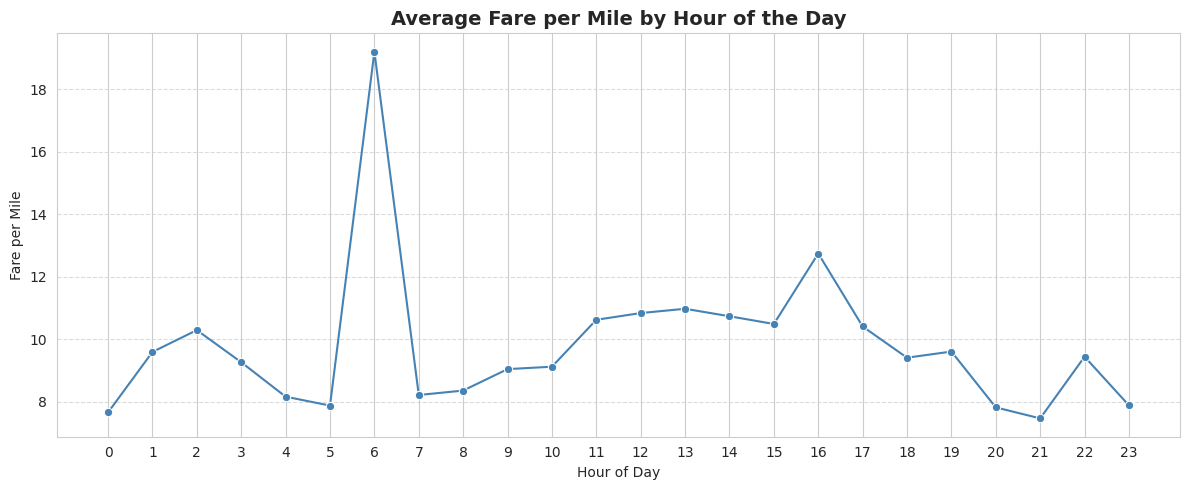

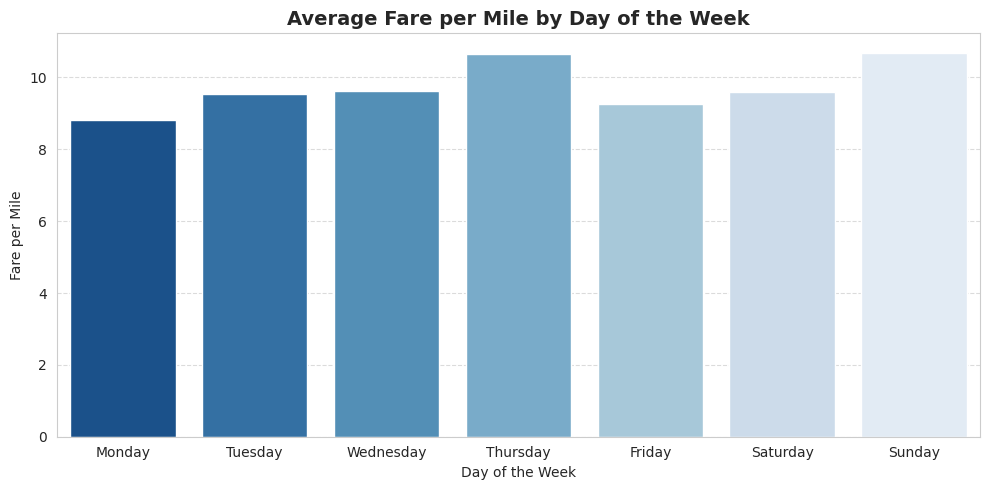

In [136]:
# Compare the average fare per mile for different days and for different times of the day

# Extract hour of the day and day of the week
mergedData['hour_of_day'] = mergedData['tpep_pickup_datetime'].dt.hour
mergedData['day_of_week'] = mergedData['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate fare per mile
mergedData['fare_per_mile'] = mergedData['fare_amount'] / mergedData['trip_distance']

# Average fare per mile by hour of the day
avgFarePerMileHour = mergedData.groupby('hour_of_day')['fare_per_mile'].mean().reset_index()

# Average fare per mile by day of the week
avgFarePerMileDay = mergedData.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Map day of the week to string names
avgFarePerMileDay['day_of_week'] = avgFarePerMileDay['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

# Display the results
print("Average Fare per Mile by Hour of the Day:")
print(avgFarePerMileHour)

print("\nAverage Fare per Mile by Day of the Week:")
print(avgFarePerMileDay)




# Plot: Average fare per mile by hour of the day
sns.set_style("whitegrid")
plt.figure(figsize=(12,5))
sns.lineplot(
    x='hour_of_day',
    y='fare_per_mile',
    data=avgFarePerMileHour,
    marker='o',
    color='steelblue'
)
plt.title('Average Fare per Mile by Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile')
plt.xticks(range(0,24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Average fare per mile by day of the week (bar plot)
plt.figure(figsize=(10,5))
palette = sns.color_palette("Blues_r", n_colors=len(avgFarePerMileDay))
sns.barplot(
    x='day_of_week',
    y='fare_per_mile',
    data=avgFarePerMileDay,
    palette=palette
)
plt.title('Average Fare per Mile by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week')
plt.ylabel('Fare per Mile')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average Fare per Mile by Vendor and Hour of the Day:
hour_of_day        0          1          2          3         4          5   \
VendorID                                                                      
1            7.014165   6.762416   6.669305   6.417527  6.695684  11.493610   
2            7.855551  10.380500  11.397408  10.080246  8.656630   6.667534   

hour_of_day         6         7         8         9   ...         14  \
VendorID                                              ...              
1             6.693960  7.433142  8.194725  8.919183  ...   9.495743   
2            24.736127  8.533227  8.424240  9.096564  ...  11.182196   

hour_of_day         15         16         17        18         19        20  \
VendorID                                                                      
1             9.091710   9.021675   9.128639  8.531645   8.077838  7.723287   
2            11.012428  14.112611  10.848291  9.722247  10.135654  7.854228   

hour_of_day        21   

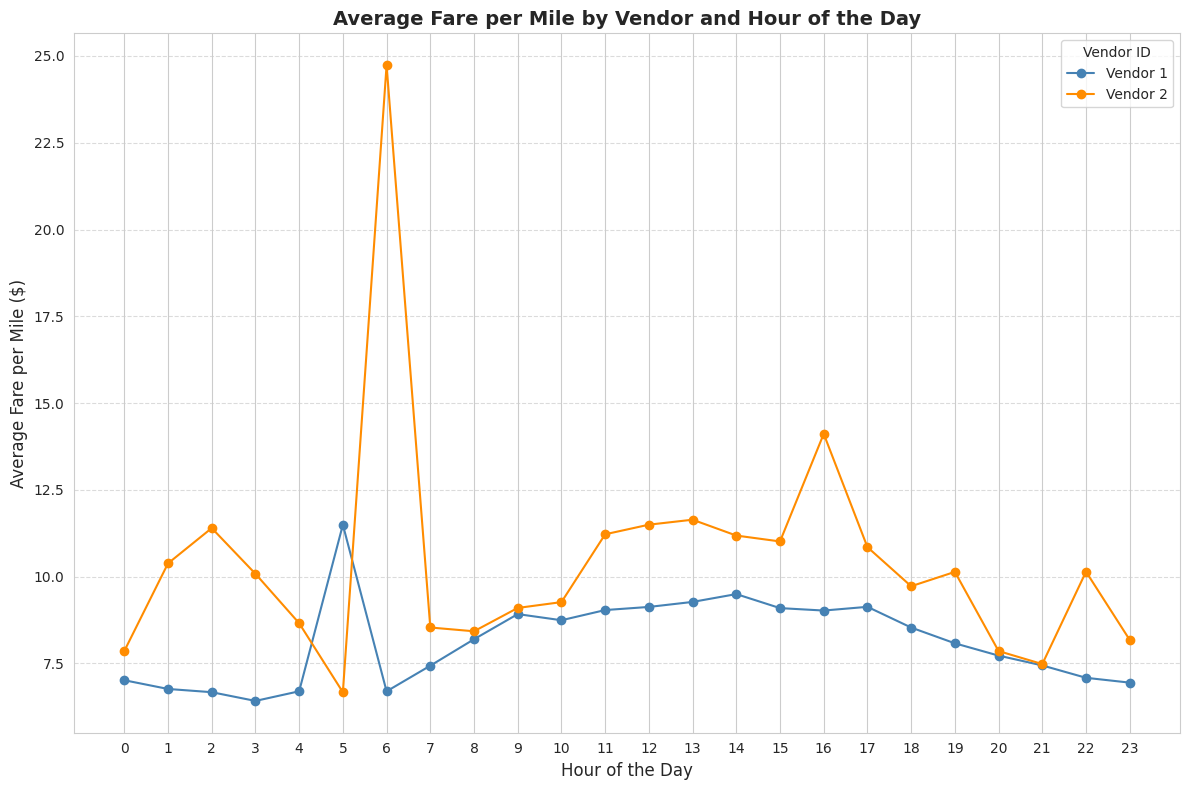

In [137]:
# Compare fare per mile for different vendors

# Calculate fare per mile
mergedData['fare_per_mile'] = mergedData['fare_amount'] / mergedData['trip_distance']

# Group by VendorID and hour_of_day to calculate average fare per mile
avgFarePerMileByVendorHour = mergedData.groupby(['VendorID', 'hour_of_day'])['fare_per_mile'].mean().reset_index()

# Pivot the table for visualization (VendorID as rows, hour_of_day as columns)
farePivotTable = avgFarePerMileByVendorHour.pivot(index='VendorID', columns='hour_of_day', values='fare_per_mile')

# Display the pivot table
print("Average Fare per Mile by Vendor and Hour of the Day:")
print(farePivotTable)

# Plot the results for each vendor
plt.figure(figsize=(12, 8))
colors = ['steelblue', 'darkorange']  # Different colors for each vendor
for i, vendorId in enumerate(farePivotTable.index):
    plt.plot(
        farePivotTable.columns,
        farePivotTable.loc[vendorId],
        marker='o',
        color=colors[i % len(colors)],
        label=f"Vendor {vendorId}"
    )

plt.title('Average Fare per Mile by Vendor and Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Fare per Mile ($)', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Vendor ID')
plt.tight_layout()
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average Fare per Mile by Vendor and Distance Category:
distance_category  Up to 2 miles  2 to 5 miles  More than 5 miles
VendorID                                                         
1                       9.521990      6.337568           5.120429
2                      12.530913      6.537020           5.199714


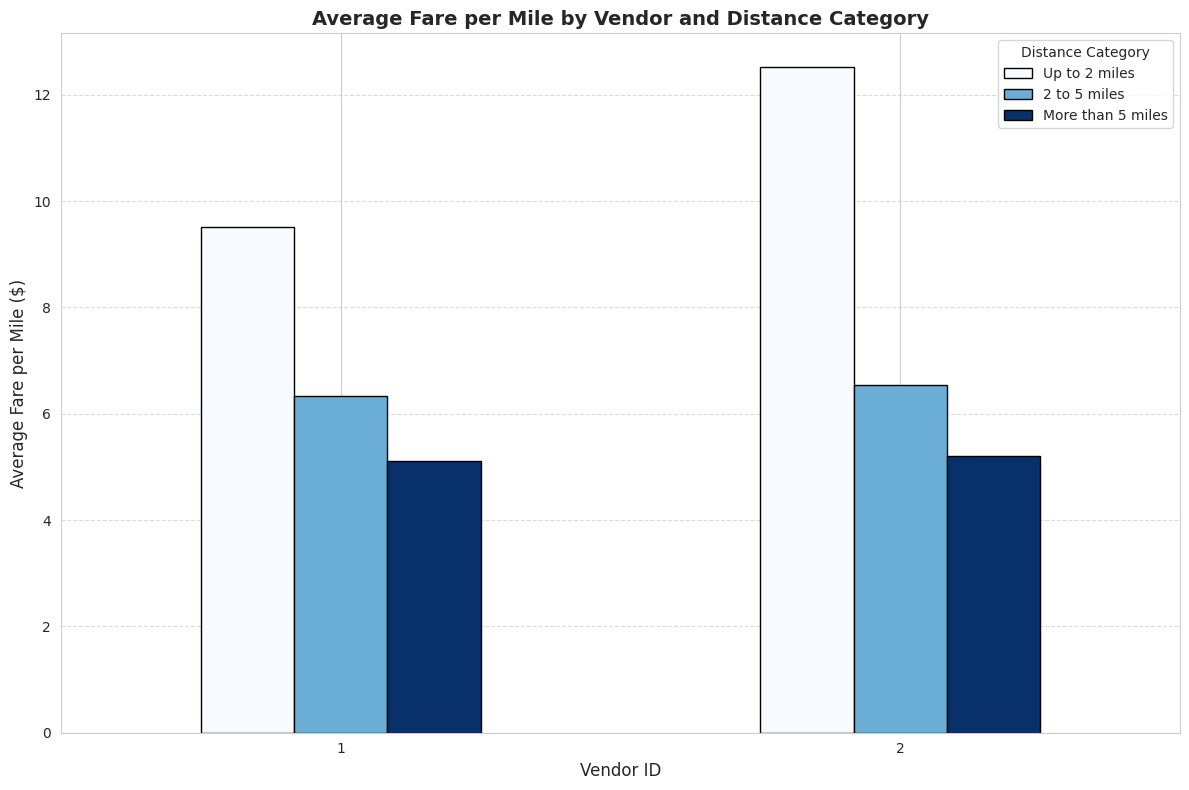

In [138]:
# Defining distance tiers

distance_labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']

# Create a new column for distance category
mergedData['distance_category'] = pd.cut(
    mergedData['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=distance_labels,
    right=True
)

# Calculate average fare per mile by Vendor and distance category
avg_fare_per_mile_by_vendor = mergedData.groupby(['VendorID', 'distance_category'])['fare_per_mile'].mean().reset_index()
fare_pivot_table = avg_fare_per_mile_by_vendor.pivot(
    index='VendorID',
    columns='distance_category',
    values='fare_per_mile'
)

print("Average Fare per Mile by Vendor and Distance Category:")
print(fare_pivot_table)

fare_pivot_table.plot(
    kind='bar',
    figsize=(12, 8),
    colormap='Blues',
    edgecolor='black'
)
plt.title('Average Fare per Mile by Vendor and Distance Category', fontsize=14, fontweight='bold')
plt.xlabel('Vendor ID', fontsize=12)
plt.ylabel('Average Fare per Mile ($)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Distance Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

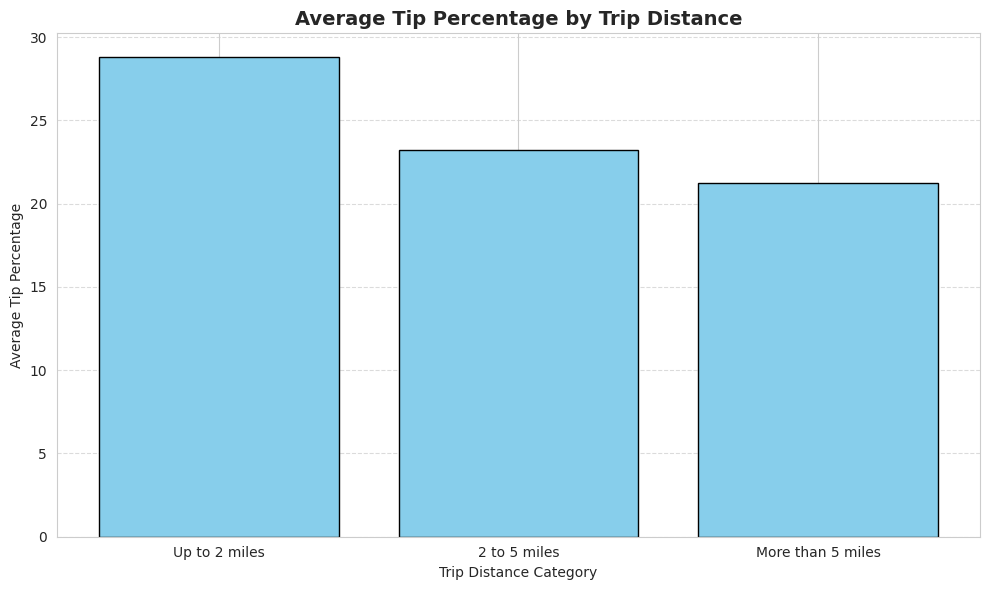

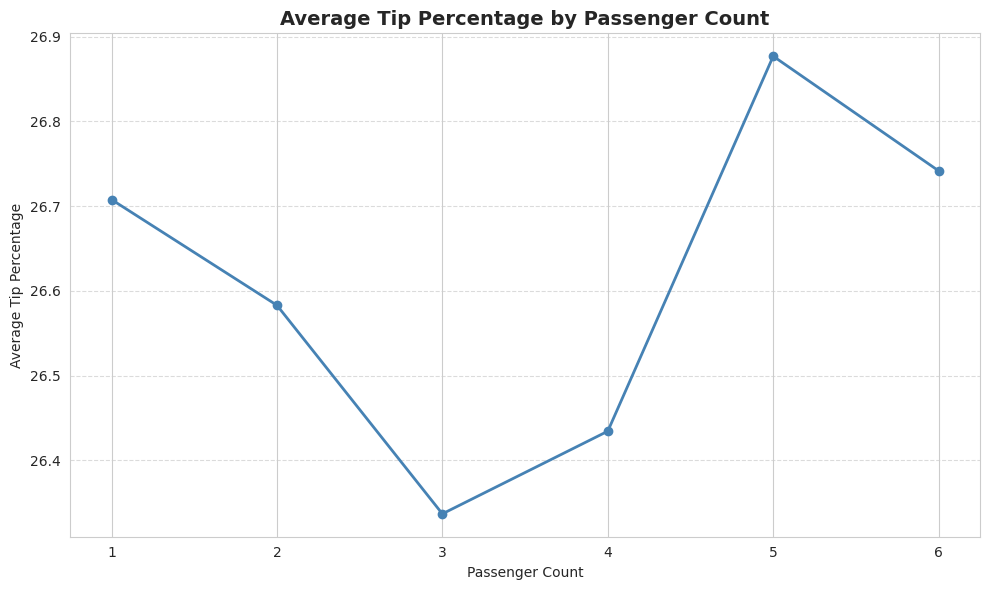

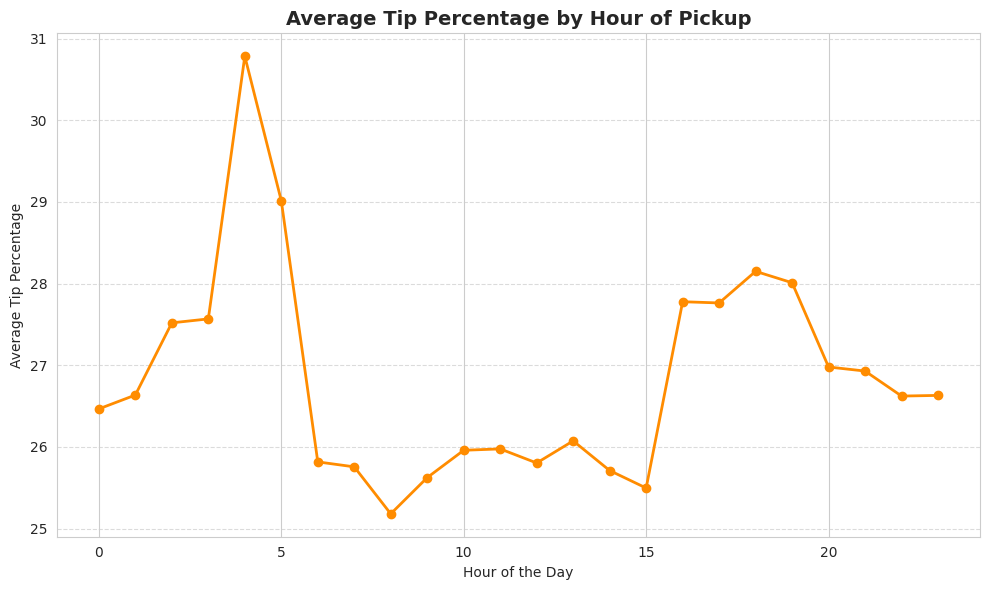

Correlation matrix for factors affecting tip percentage:
                 trip_distance  passenger_count  hour_of_day  tip_percentage
trip_distance         1.000000         0.015855     0.006161       -0.249767
passenger_count       0.015855         1.000000     0.017595       -0.003163
hour_of_day           0.006161         0.017595     1.000000        0.029198
tip_percentage       -0.249767        -0.003163     0.029198        1.000000


In [139]:
# Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage
mergedData['tip_percentage'] = (mergedData['tip_amount'] / mergedData['fare_amount']) * 100

# Categorize trip distances
distance_labels = ['Up to 2 miles', '2 to 5 miles', 'More than 5 miles']
mergedData['distance_category'] = pd.cut(
    mergedData['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=distance_labels,
    right=True
)

# Average tip percentage by distance category
avg_tip_by_distance = mergedData.groupby('distance_category')['tip_percentage'].mean().reset_index()

# Average tip percentage by passenger count
avg_tip_by_passenger = mergedData.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Average tip percentage by hour of pickup
avg_tip_by_hour = mergedData.groupby('hour_of_day')['tip_percentage'].mean().reset_index()

# Plot: Tip percentage by distance
plt.figure(figsize=(10, 6))
plt.bar(
    avg_tip_by_distance['distance_category'],
    avg_tip_by_distance['tip_percentage'],
    color='skyblue', edgecolor='black'
)
plt.title('Average Tip Percentage by Trip Distance', fontsize=14, fontweight='bold')
plt.xlabel('Trip Distance Category')
plt.ylabel('Average Tip Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Tip percentage by passenger
plt.figure(figsize=(10, 6))
plt.plot(
    avg_tip_by_passenger['passenger_count'],
    avg_tip_by_passenger['tip_percentage'],
    marker='o', color='steelblue', linewidth=2
)
plt.title('Average Tip Percentage by Passenger Count', fontsize=14, fontweight='bold')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot: Tip percentage by hour of day
plt.figure(figsize=(10, 6))
plt.plot(
    avg_tip_by_hour['hour_of_day'],
    avg_tip_by_hour['tip_percentage'],
    marker='o', color='darkorange', linewidth=2
)
plt.title('Average Tip Percentage by Hour of Pickup', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Tip Percentage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Correlation
tip_correlation = mergedData[['trip_distance', 'passenger_count', 'hour_of_day', 'tip_percentage']].corr()
print("Correlation matrix for factors affecting tip percentage:")
print(tip_correlation)



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Low Tip Group (tip percentage < 10%)
   trip_distance  fare_amount  tip_amount  passenger_count
0       2.630146    17.883201    1.211899         1.366539

High Tip Group (tip percentage > 25%)
   trip_distance  fare_amount  tip_amount  passenger_count
0       1.578784    11.685411    3.626221         1.360096


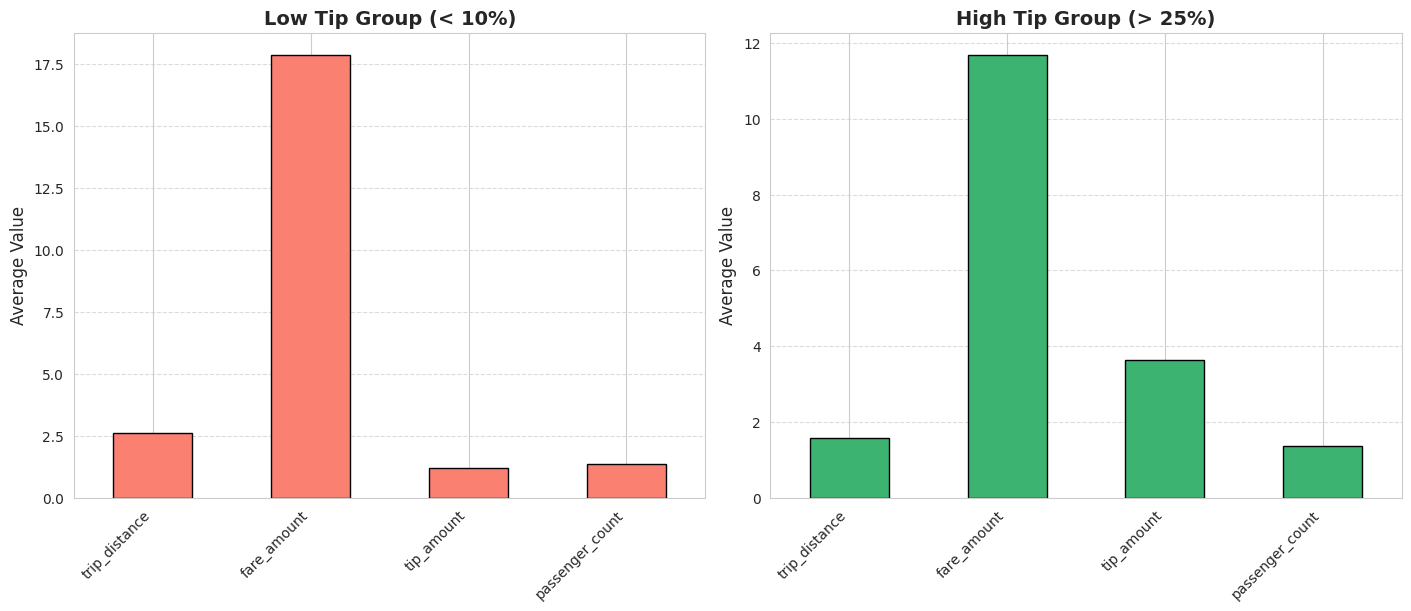

In [140]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
mergedData['tip_percentage'] = (mergedData['tip_amount'] / mergedData['fare_amount']) * 100

# Filter trips based on tip percentage
low_tip_df = mergedData[mergedData['tip_percentage'] < 10]
high_tip_df = mergedData[mergedData['tip_percentage'] > 25]

# Compute average statistics for both groups
low_tip_stats = low_tip_df[['trip_distance', 'fare_amount', 'tip_amount', 'passenger_count']].mean()
high_tip_stats = high_tip_df[['trip_distance', 'fare_amount', 'tip_amount', 'passenger_count']].mean()

# Display statistics for comparison
print("Low Tip Group (tip percentage < 10%)")
print(low_tip_stats.to_frame().T)
print("\nHigh Tip Group (tip percentage > 25%)")
print(high_tip_stats.to_frame().T)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6), constrained_layout=True)

# Low tip group plot
low_tip_stats.plot(kind='bar', ax=axes[0], color='salmon', edgecolor='black')
axes[0].set_title('Low Tip Group (< 10%)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Average Value', fontsize=12)
axes[0].set_xticklabels(low_tip_stats.index, rotation=45, ha='right')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# High tip group plot
high_tip_stats.plot(kind='bar', ax=axes[1], color='mediumseagreen', edgecolor='black')
axes[1].set_title('High Tip Group (> 25%)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Average Value', fontsize=12)
axes[1].set_xticklabels(high_tip_stats.index, rotation=45, ha='right')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

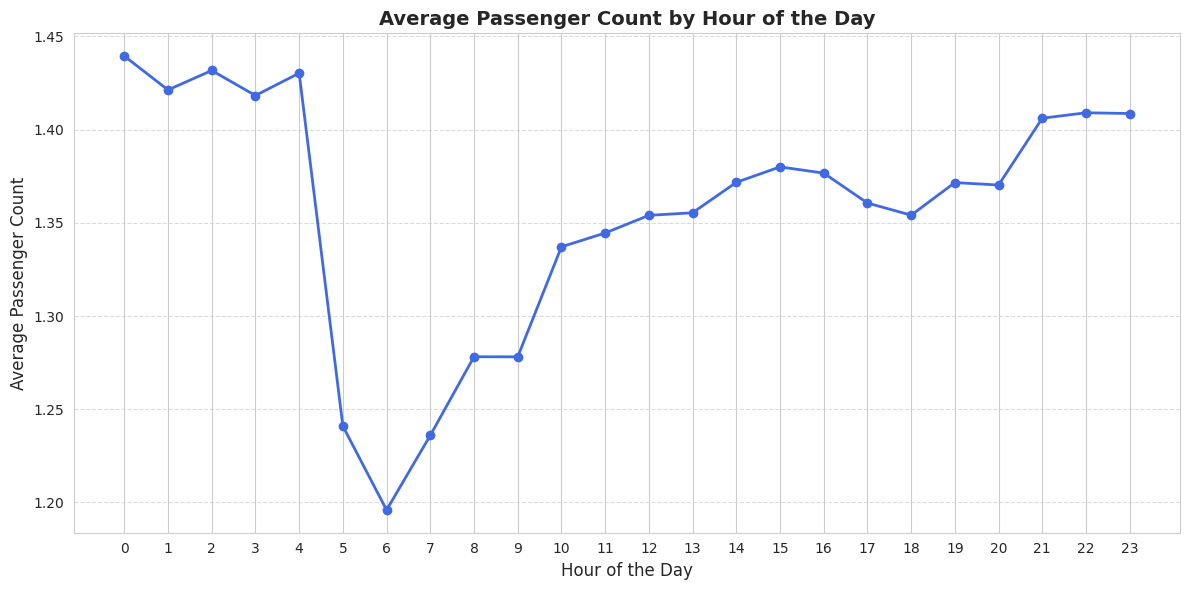

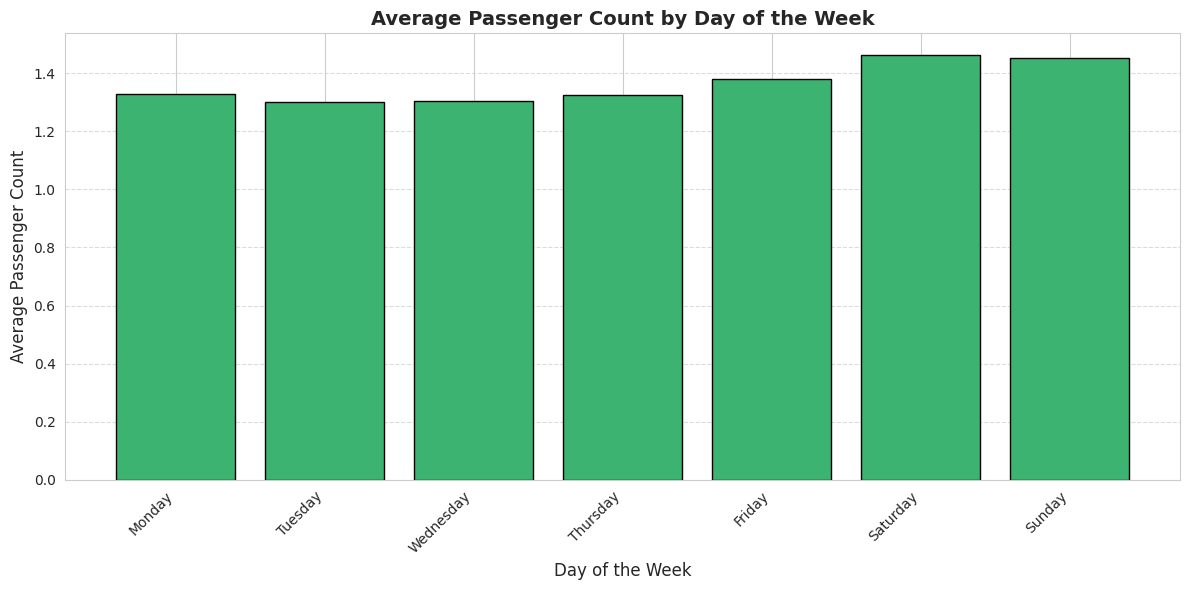

In [141]:
# See how passenger count varies across hours and days

# Average passenger count by hour of the day
avg_passengers_hour = mergedData.groupby('hour_of_day')['passenger_count'].mean().reset_index()

# Average passenger count by day of the week
avg_passengers_day = mergedData.groupby('day_of_week')['passenger_count'].mean().reset_index()
avg_passengers_day = avg_passengers_day.sort_values('day_of_week')
avg_passengers_day['day_of_week'] = avg_passengers_day['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
})

plt.figure(figsize=(12, 6))
plt.plot(
    avg_passengers_hour['hour_of_day'],
    avg_passengers_hour['passenger_count'],
    marker='o', color='royalblue', linewidth=2
)
plt.title('Average Passenger Count by Hour of the Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Passenger Count', fontsize=12)
plt.xticks(range(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(
    avg_passengers_day['day_of_week'],
    avg_passengers_day['passenger_count'],
    color='mediumseagreen', edgecolor='black'
)
plt.title('Average Passenger Count by Day of the Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Passenger Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 Pickup Locations by Average Passenger Count
     PULocationID  passenger_count
57            119         4.000000
41             82         3.666667
123           228         3.250000
102           191         3.000000
105           194         2.500000
107           197         2.250000
32             67         2.000000
29             62         2.000000
121           225         2.000000
118           222         2.000000

Top 10 Dropoff Locations by Average Passenger Count
     DOLocationID  passenger_count
108           167         4.000000
60            102         3.000000
126           194         2.176471
54             91         2.000000
73            128         2.000000
92            147         2.000000
97            155         2.000000
76            131         2.000000
0               1         2.000000
7              14         2.000000


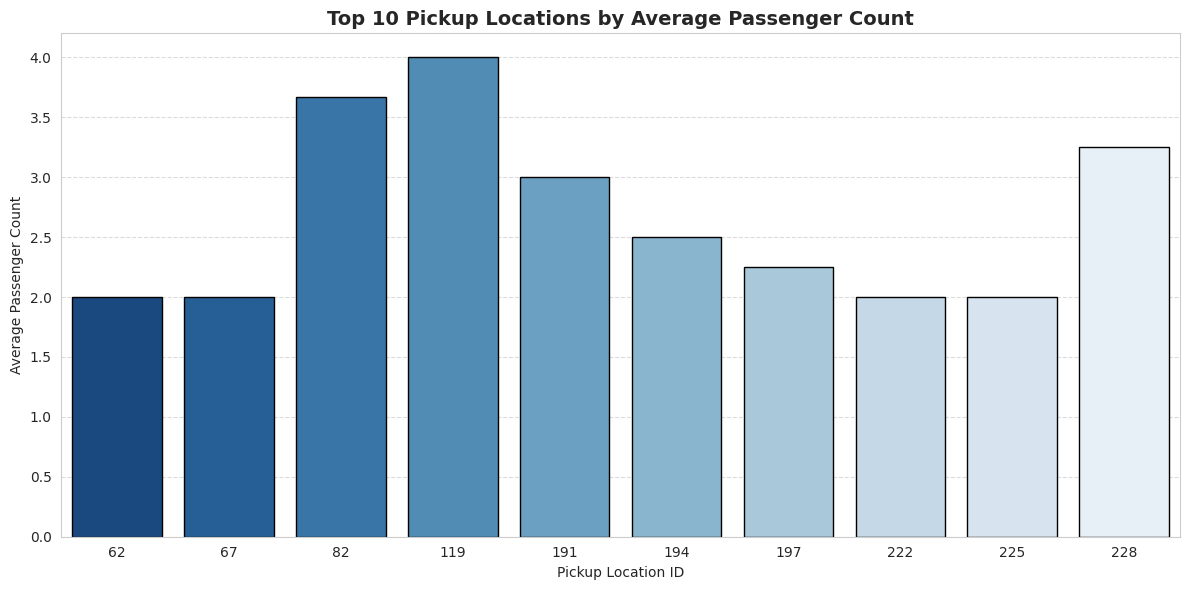

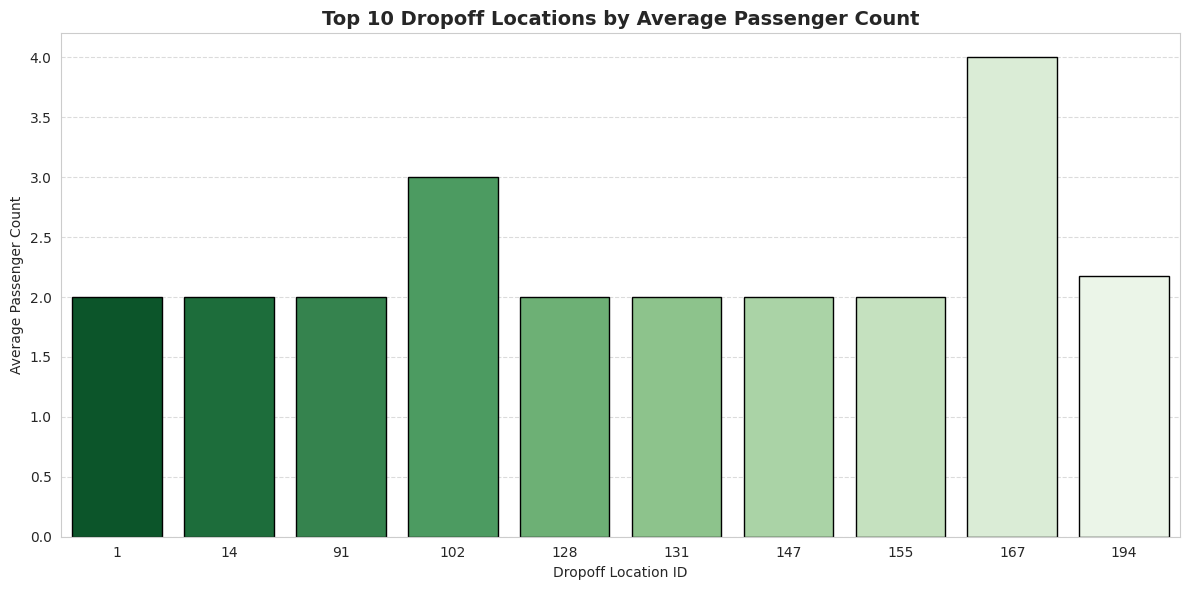

In [142]:
# How does passenger count vary across zones

# Average passenger count by pickup location
avgPassengerCountPickup = mergedData.groupby('PULocationID')['passenger_count'].mean().reset_index()
avgPassengerCountPickup = avgPassengerCountPickup.sort_values(by='passenger_count', ascending=False)

# Average passenger count by dropoff location
avgPassengerCountDropoff = mergedData.groupby('DOLocationID')['passenger_count'].mean().reset_index()
avgPassengerCountDropoff = avgPassengerCountDropoff.sort_values(by='passenger_count', ascending=False)

# Display top 10 pickup locations
print("Top 10 Pickup Locations by Average Passenger Count")
print(avgPassengerCountPickup.head(10))

# Display top 10 dropoff locations
print("\nTop 10 Dropoff Locations by Average Passenger Count")
print(avgPassengerCountDropoff.head(10))


# Top 10 pickup locations
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
sns.barplot(
    x='PULocationID',
    y='passenger_count',
    data=avgPassengerCountPickup.head(10),
    palette='Blues_r',
    edgecolor='black'
)
plt.title('Top 10 Pickup Locations by Average Passenger Count', fontsize=14, fontweight='bold')
plt.xlabel('Pickup Location ID')
plt.ylabel('Average Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top 10 dropoff locations
plt.figure(figsize=(12,6))
sns.barplot(
    x='DOLocationID',
    y='passenger_count',
    data=avgPassengerCountDropoff.head(10),
    palette='Greens_r',
    edgecolor='black'
)
plt.title('Top 10 Dropoff Locations by Average Passenger Count', fontsize=14, fontweight='bold')
plt.xlabel('Dropoff Location ID')
plt.ylabel('Average Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                      zone        borough  avg_passenger_pickup  \
0           Newark Airport            EWR              2.000000   
1              Jamaica Bay         Queens                   NaN   
2  Allerton/Pelham Gardens          Bronx                   NaN   
3            Alphabet City      Manhattan              1.406926   
4            Arden Heights  Staten Island                   NaN   
5  Arrochar/Fort Wadsworth  Staten Island                   NaN   
6                  Astoria         Queens              1.232558   
7             Astoria Park         Queens                   NaN   
8               Auburndale         Queens                   NaN   
9             Baisley Park         Queens              1.000000   

   avg_passenger_dropoff  
0               2.000000  
1                    NaN  
2                    NaN  
3               1.431319  
4                    NaN  
5                    NaN  
6               1.300469  
7               1.000000  
8                  

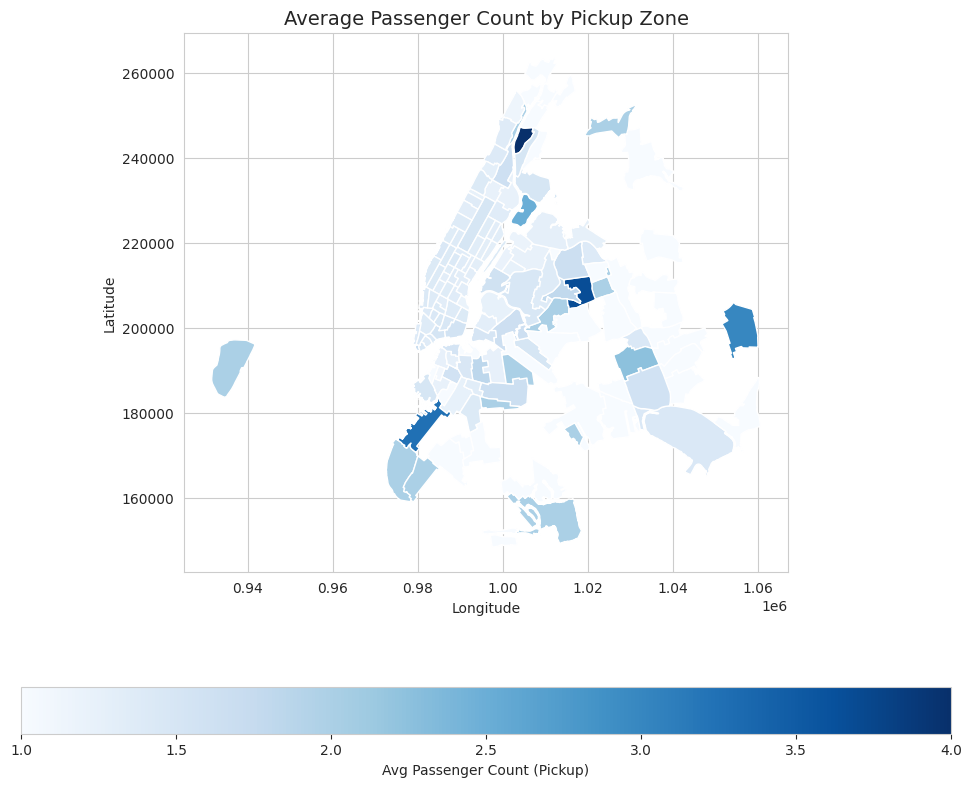

In [143]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_pickup = mergedData.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_pickup.rename(columns={'PULocationID': 'LocationID', 'passenger_count': 'avg_passenger_pickup'}, inplace=True)

avg_passenger_dropoff = mergedData.groupby('DOLocationID')['passenger_count'].mean().reset_index()
avg_passenger_dropoff.rename(columns={'DOLocationID': 'LocationID', 'passenger_count': 'avg_passenger_dropoff'}, inplace=True)

zones_with_trips = zones.copy()
zones_with_trips = zones_with_trips.merge(avg_passenger_pickup, on='LocationID', how='left')
zones_with_trips = zones_with_trips.merge(avg_passenger_dropoff, on='LocationID', how='left')

print(zones_with_trips[['zone', 'borough', 'avg_passenger_pickup', 'avg_passenger_dropoff']].head(10))

fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='avg_passenger_pickup',
    ax=ax,
    legend=True,
    cmap='Blues',
    legend_kwds={'label': "Avg Passenger Count (Pickup)", 'orientation': "horizontal"}
)
plt.title("Average Passenger Count by Pickup Zone", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

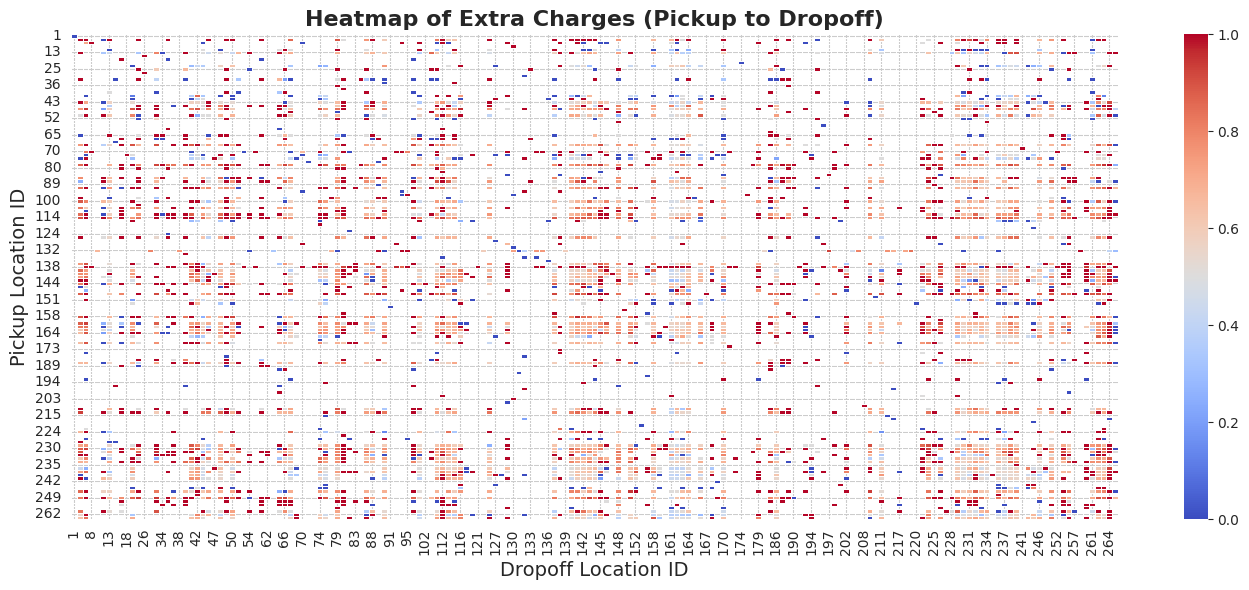

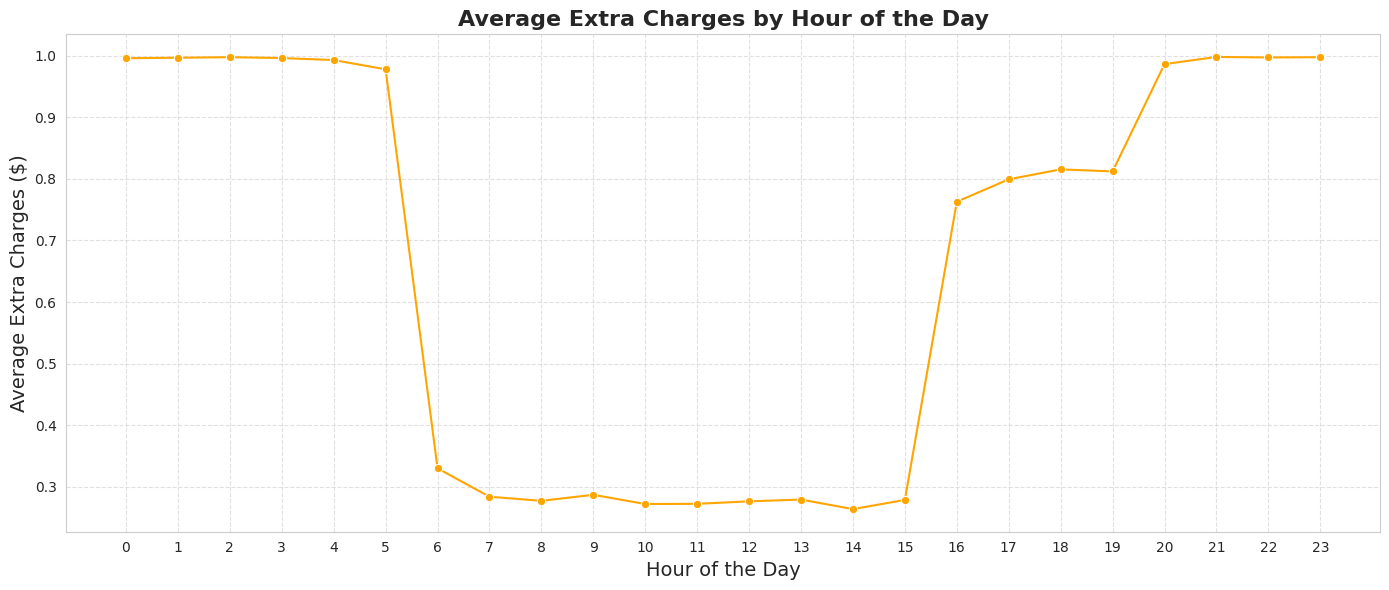

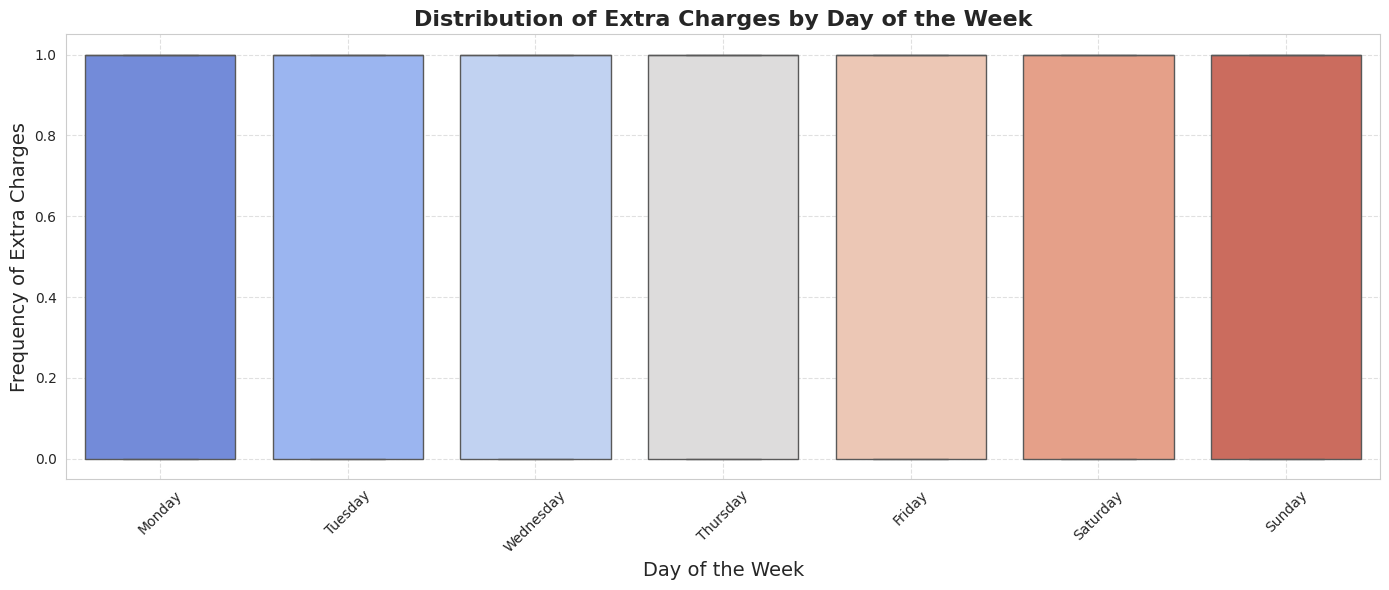

In [144]:
# How often is each surcharge applied?

# Flag rows where extra charge was applied
mergedData['extraChargeApplied'] = (mergedData['extra'] > 0)

# Heatmap of Extra Charges (Pickup to Dropoff)
plt.figure(figsize=(14, 6))
extraChargeHeatmapData = mergedData.pivot_table(
    values='extraChargeApplied',
    index='PULocationID',
    columns='DOLocationID',
    aggfunc='mean'
)
sns.heatmap(extraChargeHeatmapData, cmap='coolwarm', linewidths=0.5, annot=False)
plt.title("Heatmap of Extra Charges (Pickup to Dropoff)", fontsize=16, fontweight='bold')
plt.xlabel("Dropoff Location ID", fontsize=14)
plt.ylabel("Pickup Location ID", fontsize=14)
plt.tight_layout()
plt.show()

# Average Extra Charges by Hour of the Day
plt.figure(figsize=(14, 6))
avg_extra = mergedData.groupby('hour_of_day')['extraChargeApplied'].mean().reset_index()
sns.lineplot(
    x='hour_of_day',
    y='extraChargeApplied',
    data=avg_extra,
    marker='o',
    color='orange'
)
plt.title('Average Extra Charges by Hour of the Day', fontsize=16, fontweight='bold')
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Average Extra Charges ($)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(range(0, 24, 1))
plt.tight_layout()
plt.show()

#Distribution of Extra Charges by Day of the Week
mergedData['dayOfWeek'] = mergedData['tpep_pickup_datetime'].dt.strftime('%A')
daysOfWeekOrder = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mergedData['dayOfWeek'] = pd.Categorical(mergedData['dayOfWeek'], categories=daysOfWeekOrder, ordered=True)
plt.figure(figsize=(14, 6))
sns.boxplot(
    x='dayOfWeek',
    y='extraChargeApplied',
    data=mergedData,
    palette='coolwarm'
)
plt.title('Distribution of Extra Charges by Day of the Week', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Frequency of Extra Charges', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**Observation**
* Trip activity is highest between 3 PM and 7 PM, with **6 PM** recording the largest number of rides (~290k scaled).
* Demand is minimal during late nights/early mornings (2 AM – 5 AM).
* Weekdays show strong commuter-driven peaks, while weekends have a smoother demand curve, especially between 12 PM and 8 PM.
* A large share of earnings comes from daytime trips (≈**88.41**%), with nighttime contributing less.


**Recommendations**
* Increase fleet presence in the afternoon and evening commute window (**3 PM - 7 PM**), with **special focus at 6 PM**.
* Use a reduced but reliable fleet during very low-demand hours (**2 AM - 5 AM**), while keeping coverage for airport and nightlife trips.
* Stagger driver shifts to balance supply with weekday rush peaks and weekend midday surges.











**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**Observations**
* Zones IDs 239, 237, 236, 234, 142, 161, 162, 170, 186 dominate during peak activity hours.
* Night pickup hotspots: IDs 237, 161, 236, 162, 142
* Central areas such as Midtown and Upper East Side South consistently record the most rides.
* Outlying areas such as Bronx and Queens generate significantly fewer trips.


**Recommendations**

* Deploy higher taxi density in central Manhattan zones during weekday rush hours.
* At night, shift supply toward late-hour hotspots (zones 237, 161, 236, 162, 142) to meet demand linked to nightlife and late flights.
* Keep some taxis available in less busy areas so passengers can still get a ride, but don’t send too many cars there since demand is low











**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

**Observations**

* Per-mile fares are highest for solo passengers ~**9.4 USD** and lowest for larger groups ~**1.3 USD** for 6 passengers
* Vendor 2 generally charges more per mile compared to Vendor 1, especially on shorter rides.
* Short trips (less than 2 miles) attract the highest tipping rates (~28%), while tips decline as trip length increases.
* Extra surcharges are most common late at night (12–6 AM), especially around 5 AM.

**Recommendations**

* Offer shared-ride or group discounts to encourage multi-passenger trips and balance out per-person pricing.
* Apply dynamic pricing rules: raise fares modestly during weekday rush hours (3–7 PM) and late-night windows, but offer off-peak discounts on weekends or early mornings to boost demand.
* Differentiate vendor positioning: Vendor 1 as a budget option and Vendor 2 as premium/fast-service option.
* Provide incentives for short city trips, since they generate higher tip percentages.
* During low-revenue months **July, August, September** - Quarter 3 , roll out special promotions to maintain steady income levels.